In [ ]:
# Function to analyze label combinations specifically
def analyze_label_combinations(df, label_col='Label Vector', string_col='Label String', min_threshold=10):
    """
    Analyze label combinations in detail to identify rare combinations
    
    Parameters:
    -----------
    df: DataFrame
        Input dataframe with labels
    label_col: str
        Column name for label vectors
    string_col: str
        Column name for label strings
    min_threshold: int
        Threshold below which a combination is considered rare
        
    Returns:
    --------
    rare_combinations: list
        List of rare label combinations
    combo_stats: dict
        Statistics about label combinations
    """
    print("Analyzing label combinations...")
    
    # Count label combinations
    combo_counts = df[string_col].value_counts()
    
    # Identify rare combinations
    rare_combinations = combo_counts[combo_counts <= min_threshold].index.tolist()
    
    # Map combinations to their corresponding indices
    rare_combo_indices = {}
    for combo in rare_combinations:
        indices = df[df[string_col] == combo].index.tolist()
        rare_combo_indices[combo] = indices
    
    # Count total unique combinations
    total_combinations = len(combo_counts)
    rare_combo_count = len(rare_combinations)
    
    # Get statistics about label cardinality (number of labels per sample)
    cardinality = []
    for combo in combo_counts.index:
        num_labels = len(combo.split(' and ')) if ' and ' in combo else 1
        cardinality.append(num_labels)
    
    cardinality_counts = pd.Series(cardinality).value_counts().sort_index()
    
    # Print summary
    print(f"Total unique label combinations: {total_combinations}")
    print(f"Rare combinations (≤{min_threshold} samples): {rare_combo_count} ({rare_combo_count/total_combinations*100:.2f}%)")
    
    print("\nLabel cardinality distribution:")
    for card, count in cardinality_counts.items():
        print(f"{card} label(s): {count} combinations ({count/total_combinations*100:.2f}%)")
    
    print("\nTop 10 most common combinations:")
    for combo, count in combo_counts.head(10).items():
        print(f"{combo}: {count} samples")
    
    print("\nRare combinations (≤5 samples):")
    for combo, count in combo_counts[combo_counts <= 5].items():
        print(f"{combo}: {count} samples")
    
    # Collect stats on pair-wise co-occurrences
    label_names = ['BEACH', 'CITY', 'COAST', 'DESERT', 'FOREST', 'ISLAND', 'LAKE', 'MOUNTAIN', 'RIVER', 'SNOW']
    cooccurrence = np.zeros((len(label_names), len(label_names)))
    
    for _, row in df.iterrows():
        combo = row[string_col]
        labels_present = [label for label in label_names if label in combo]
        
        for i, label1 in enumerate(labels_present):
            for j, label2 in enumerate(labels_present):
                if i != j:  # Don't count self-cooccurrence
                    idx1 = label_names.index(label1)
                    idx2 = label_names.index(label2)
                    cooccurrence[idx1, idx2] += 1
    
    # Return collected data
    combo_stats = {
        'total_combinations': total_combinations,
        'rare_combinations': rare_combinations,
        'rare_combo_indices': rare_combo_indices,
        'cardinality_counts': cardinality_counts,
        'combo_counts': combo_counts,
        'cooccurrence_matrix': cooccurrence
    }
    
    return rare_combinations, combo_stats

# Visualize label combinations
def visualize_combination_stats(combo_stats):
    """
    Visualize statistics about label combinations
    """
    label_names = ['BEACH', 'CITY', 'COAST', 'DESERT', 'FOREST', 'ISLAND', 'LAKE', 'MOUNTAIN', 'RIVER', 'SNOW']
    
    # Create a multi-panel figure
    fig = plt.figure(figsize=(20, 15))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2])
    
    # 1. Label cardinality distribution
    ax1 = fig.add_subplot(gs[0, 0])
    cardinality_counts = combo_stats['cardinality_counts']
    ax1.bar(cardinality_counts.index, cardinality_counts.values, color='skyblue', edgecolor='navy')
    ax1.set_xlabel('Number of Labels per Sample')
    ax1.set_ylabel('Number of Unique Combinations')
    ax1.set_title('Label Cardinality Distribution', fontsize=14, fontweight='bold')
    ax1.set_xticks(cardinality_counts.index)
    for i, v in enumerate(cardinality_counts.values):
        ax1.text(cardinality_counts.index[i], v + 0.5, str(v), ha='center')
    
    # 2. Top combinations by frequency
    ax2 = fig.add_subplot(gs[0, 1])
    top_combos = combo_stats['combo_counts'].head(10)
    sns.barplot(x=top_combos.values, y=top_combos.index, palette='viridis', ax=ax2)
    ax2.set_title('Top 10 Label Combinations', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Label Combination')
    
    # 3. Co-occurrence heatmap
    ax3 = fig.add_subplot(gs[1, :])
    cooccurrence = combo_stats['cooccurrence_matrix']
    sns.heatmap(cooccurrence, annot=True, fmt='.0f', cmap='Blues', 
                xticklabels=label_names, yticklabels=label_names, ax=ax3)
    ax3.set_title('Label Co-occurrence Matrix', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Additional plot for rare combinations
    plt.figure(figsize=(12, 8))
    rare_counts = combo_stats['combo_counts'][combo_stats['combo_counts'] <= 10].sort_values(ascending=False)
    
    if len(rare_counts) > 0:
        plt.bar(range(len(rare_counts)), rare_counts.values, color='coral')
        plt.xticks(range(len(rare_counts)), rare_counts.index, rotation=90)
        plt.title('Rare Label Combinations (≤10 samples)', fontsize=14, fontweight='bold')
        plt.xlabel('Label Combination')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    else:
        print("No rare combinations to visualize.")

# Note: The function is defined here but will be used later after loading the data
# Do not call analyze_label_combinations here as train_data_raw is not yet defined

### UPRM Hackathon 2025 - MultiLabel Image Classification using Convolutional Neural Networks

* <b> Author: </b> Jean Han, Hamzah Abdulrazzaq, Edgar Perez
* <b> Date: </b> September 5th, 2025
* <b> Objective: 
UPRM Hackathon 2025 will be focused on exploring the capabilities of Convolutional Neural Networks (CNNs) in tackling complex image classification tasks. Specifically, participants will delve into the realm of MultiLabel, MultiClass image classification using the 'Nasa Geographical Objects' dataset, which comprises a diverse range of geographical features. The dataset includes images of various landscapes, such as islands, mountains, deserts, rivers, lakes, forests, and cities, with some images featuring combinations of these features. The task at hand is to design and optimize CNN architectures to accurately predict the relevant geographical labels for a given image., The challenge lies in developing a robust model that can effectively handle the complexities of MultiLabel, MultiClass classification, requiring meticulous attention to data preprocessing, hyper-parameter tuning, and potentially incorporating techniques such as transfer learning, data augmentation, and ensemble methods. The winning submissions will be evaluated based on their performance, with a key metric being the model's ability to balance precision and recall across multiple labels.
   </b> 
* <b> Dataset License Acknowledgement: Image courtesy of the Earth Science and Remote Sensing Unit, NASA Johnson Space Center


## Table of Contents

- [Background Information: Neural Networks and Multi-Label Classification](#Background-Information:-Neural-Networks-and-Multi-Label-Classification)
- [Importing Necessary Libraries](#Importing-Necessary-Libraries)
- [Configurations + Basic Visualization](#Configurations-+-Basic-Visualization)
- [Dealing with Data Imbalance](#Data-Imbalance)
- [Custom Image Dataset](#Custom-Image-Dataset)
- [Image Augmentation](#Image-Augmentation)
- [Building CNN Architecture](#Building-CNN-Architecture)
- [Model Training](#Model-Training)
- [Visualize Loss and F1](#Visualize-Metrics)
- [Performance Analysis (Where is the model underperforming?)](#Where-is-the-model-underperforming)
- [Performance Analysis (Confusion Matrix)](#Confusion-Matrix)

<!-- ## Background Information: Neural Networks and Multi-Label Classification -->

#### Convolutional Neural Networks:
A convolutional neural network (CNN or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. They have proven to be very effective in image and video recognition, recommender systems, image classification, medical image analysis, natural language processing, brain-computer interfaces, and financial time series modeling. CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting data. Typical ways of regularization include adding some form of magnitude measurement of weights to the loss function. CNNs take a different approach towards regularization: they take advantage of the hierarchical pattern in data and assemble more complex patterns using smaller and simpler patterns. Therefore, on the scale of connectedness and complexity, CNNs are on the lower extreme.Convolutional networks were inspired by biological processes in that the connectivity pattern between neurons resembles the organization of the animal visual cortex. Individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the receptive field. The receptive fields of different neurons partially overlap such that they cover the entire visual field.


#### MultiLabel Classification

In traditional image classification (single-label), each image belongs to exactly one class. However, in multi-label classification, each image can simultaneously belong to multiple classes. For example, an image might contain both a "dog" and a "person" - requiring the model to predict multiple correct labels. This fundamentally changes the classification problem from selecting a single class from mutually exclusive options to making independent binary decisions about the presence of each possible class.

#### Challenges of MultiLabel Classification

1. __Class Imbalance__: Some labels may appear much more frequently than others.
2. __Label Correlations__: Labels often exhibit strong correlations (e.g., "beach" and "ocean" frequently co-occur), which the model needs to learn.
3. __Evaluation Complexity__: Simple accuracy metrics become insufficient; metrics like F1-score, Hamming loss, mean average precision (mAP), or precision-recall curves are more appropriate.
4. __Data Augmentation__: It is critical to ensure diversity of images with Multi-Label tasks. Effective strategies include random crops, flips, rotations, etc. 

#### Helpful Resources:
- [What are Convolutional Neural Networks](https://www.bing.com/videos/search?q=convolutional+neural+network&docid=603549927117705930&mid=E7ED04059A9474B24BFEE7ED04059A9474B24BFE&view=detail&FORM=VIRE)
- [Overview of MultiLabel Classification](https://en.wikipedia.org/wiki/Multi-label_classification)
- [MultiLabel Classification Demo for Beginners](https://medium.com/data-science-in-your-pocket/multi-label-classification-for-beginners-with-codes-6b098cc76f99)
- [Interactive Demo for Image kernels](https://deeplizard.com/resource/pavq7noze2)
- [Introduction to Pooling Layers](https://www.geeksforgeeks.org/deep-learning/cnn-introduction-to-pooling-layer/)

# Download data

In [1]:
!pip install -r requirements.txt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olebro/nasa-geographical-objects-multilabel-dataset")

# Importing Necessary Libraries

In [3]:
import torch   
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import re
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import ast
from collections import Counter
from tqdm import tqdm
from torchvision.transforms import transforms
from sklearn.utils import resample
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingLR
import torchvision.models as models
from collections import namedtuple

In [4]:
import warnings 
warnings.filterwarnings("ignore")

In [5]:
train_data_raw = pd.read_csv('data/train.csv')
val_data_raw = pd.read_csv('data/val.csv')

print(f'Training data shape: {train_data_raw.shape}')
print(f'Validation data shape: {val_data_raw.shape}')

Training data shape: (1248, 3)
Validation data shape: (765, 3)


# Configurations + Basic Visualization

In [ ]:
class Config:
    # Increased resolution for better feature extraction
    img_dimensions = (224, 224)   # Standard ImageNet size for better pretrained model performance
    channels = 3
    images_path = os.path.join(path, 'images')
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Optimized training hyperparameters
    initial_learning_rate = 0.001  # Higher initial LR with scheduler
    batch_size = 128  # Reduced for higher resolution images
    num_epochs = 50  # More epochs for better convergence
    weight_decay = 1e-4
    
    # Threshold optimization
    threshold = 0.4  # Optimized threshold for multi-label
    
    # Early stopping parameters
    patience = 7
    min_delta = 0.001
    
    print(f"Using device: {device}")
    print(f"Image dimensions: {img_dimensions}")
    print(f"Batch size: {batch_size}")

Using device: cuda
Image dimensions: (224, 224)
Batch size: 16


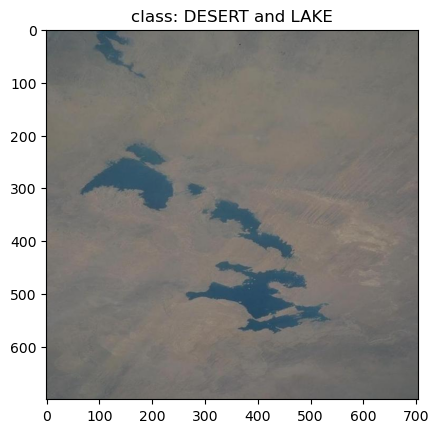

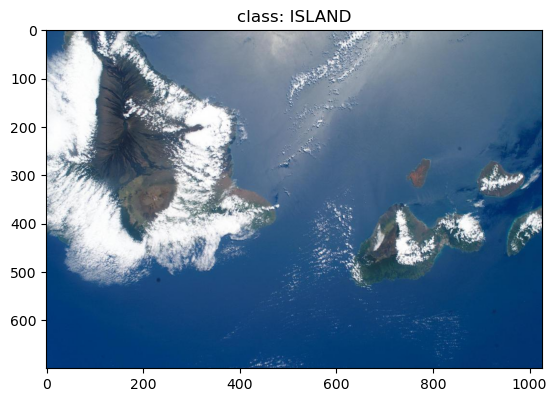

In [7]:
def img_display(path, label):
    img = cv2.imread(path)[:,:,::-1]
    plt.imshow(img)
    plt.grid(False)
    plt.title(f'class: {label}')
    plt.show()

train_imgs = [os.path.join(Config.images_path, img) for img in train_data_raw['FileName']]
train_labels = [lbl for lbl in train_data_raw['Label Vector']]
train_string_labels = [lbl for lbl in train_data_raw['Label String']]

val_imgs = [os.path.join(Config.images_path, img) for img in val_data_raw['FileName']]
val_labels = [lbl for lbl in val_data_raw['Label Vector']]
val_string_labels = [lbl for lbl in val_data_raw['Label String']]

img_display(train_imgs[0], train_string_labels[0])
img_display(val_imgs[0], val_string_labels[0])

## Data Imbalance
Data imbalance in multilabel classification presents a distinct challenge that differs from binary or multiclass settings. This imbalance occurs in two distinct forms: label-level imbalance and label-combination imbalance. Label-level imbalance arises when certain individual labels appear significantly less frequently than others. In contrast, label-combination imbalance occurs when specific combinations of labels co-occur rarely, making it difficult for models to learn effective representations for these infrequent label combinations.

We recommend reading through [Handling Data Imbalance for MultiLabel Classification](https://medium.com/thecyphy/handling-data-imbalance-in-multi-label-classification-mlsmote-531155416b87). This is a great way to get started. Another great way to handle data imbalance is by using [Focal Loss](https://docs.pytorch.org/vision/main/generated/torchvision.ops.sigmoid_focal_loss.html). 

There are many different strategies that can be implemented to solve this issue. We recommend experimenting with different options and seeing which ones provide the most promising results. 

In [ ]:
def analyze_label_distribution(data, label_col='Label Vector', string_col='Label String'):
    """
    Comprehensive analysis of label distribution in multi-label dataset
    """
    # Parse label vectors
    label_vectors = []
    for label_str in data[label_col]:
        try:
            # Try to parse as string if it's not already a list/array
            if isinstance(label_str, str):
                label_vec = ast.literal_eval(label_str)
            else:
                # If it's already a list or array, use it directly
                label_vec = label_str
            label_vectors.append(label_vec)
        except (ValueError, SyntaxError) as e:
            print(f"Error parsing label: {label_str}, type: {type(label_str)}")
            # If there's an error, try a fallback method
            if isinstance(label_str, str):
                if label_str.startswith('[') and label_str.endswith(']'):
                    # Try parsing it as a comma-separated list
                    try:
                        cleaned = label_str.strip('[]').split(',')
                        label_vec = [int(x.strip()) for x in cleaned]
                        label_vectors.append(label_vec)
                    except:
                        # If all else fails, use a default vector of zeros
                        print(f"Could not parse label: {label_str}, using zeros")
                        label_vectors.append([0] * 10)  # Assuming 10 classes
                else:
                    # Non-standard format, use zeros
                    print(f"Non-standard label format: {label_str}, using zeros")
                    label_vectors.append([0] * 10)  # Assuming 10 classes
            else:
                # Already in non-string format (like a list or numpy array)
                try:
                    label_vectors.append(list(label_str))
                except:
                    print(f"Unhandled label type: {type(label_str)}")
                    label_vectors.append([0] * 10)  # Default
    
    label_vectors = np.array(label_vectors)
    
    # Get unique label combinations and their counts
    unique_combinations = {}
    for i, row in data.iterrows():
        label_combo = row[string_col]
        if label_combo in unique_combinations:
            unique_combinations[label_combo] += 1
        else:
            unique_combinations[label_combo] = 1
    
    # Individual label frequencies
    individual_labels = ['BEACH', 'CITY', 'COAST', 'DESERT', 'FOREST', 'ISLAND', 'LAKE', 'MOUNTAIN', 'RIVER', 'SNOW']
    label_counts = np.sum(label_vectors, axis=0)
    
    print("=== INDIVIDUAL LABEL DISTRIBUTION ===")
    for i, (label, count) in enumerate(zip(individual_labels, label_counts)):
        percentage = (count / len(data)) * 100
        print(f"{label}: {count} samples ({percentage:.2f}%)")
    
    print("\n=== LABEL COMBINATION DISTRIBUTION ===")
    sorted_combinations = sorted(unique_combinations.items(), key=lambda x: x[1], reverse=True)
    for combo, count in sorted_combinations[:15]:  # Top 15 combinations
        percentage = (count / len(data)) * 100
        print(f"{combo}: {count} samples ({percentage:.2f}%)")
    
    print(f"\nTotal unique label combinations: {len(unique_combinations)}")
    
    return label_vectors, unique_combinations, label_counts, individual_labels

def visualize_class_imbalance(label_counts, individual_labels, unique_combinations):
    """
    Create visualizations for class imbalance
    """
    # Create a custom layout with 2 rows and 2 columns
    fig = plt.figure(figsize=(20, 15))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2])  # Make bottom row slightly taller

    # First graph: Individual label distribution
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.bar(individual_labels, label_counts, color='skyblue', edgecolor='navy')
    ax1.set_title('Individual Label Distribution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Labels')
    ax1.set_ylabel('Frequency')
    ax1.tick_params(axis='x', rotation=45)

    # Second graph: Imbalance ratio
    max_count = max(label_counts)
    imbalance_ratios = max_count / label_counts
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.bar(individual_labels, imbalance_ratios, color='orange', edgecolor='darkorange')
    ax2.set_title('Class Imbalance Ratio (Max/Current)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Labels')
    ax2.set_ylabel('Imbalance Ratio')
    ax2.tick_params(axis='x', rotation=45)

    # Bottom full-width heatmap: Co-occurrence matrix
    ax3 = fig.add_subplot(gs[1, :])  # Span both columns
    cooccurrence_matrix = np.zeros((len(individual_labels), len(individual_labels)))

    for combo_str, count in unique_combinations.items():
        labels_present = [i for i, label in enumerate(individual_labels) if label in combo_str]
        for i in labels_present:
            for j in labels_present:
                cooccurrence_matrix[i, j] += count

    sns.heatmap(cooccurrence_matrix,
                xticklabels=individual_labels,
                yticklabels=individual_labels,
                annot=True, fmt='.0f', cmap='Blues', ax=ax3)
    ax3.set_title('Label Co-occurrence Matrix', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return cooccurrence_matrix

    
def calculate_imbalance_metrics(label_counts):
    """
    Calculate various imbalance metrics
    """
    total_samples = np.sum(label_counts)
    
    # Imbalance Ratio (IR)
    max_class = np.max(label_counts)
    min_class = np.min(label_counts)
    imbalance_ratio = max_class / min_class
    
    # Mean Per Label (MPL)
    mean_per_label = np.mean(label_counts)
    
    # Label Cardinality (average number of labels per instance)
    # This will be calculated later when we have the full dataset
    
    # Coefficient of Variation
    cv = np.std(label_counts) / np.mean(label_counts)
    
    print("\n=== IMBALANCE METRICS ===")
    print(f"Imbalance Ratio (Max/Min): {imbalance_ratio:.2f}")
    print(f"Mean Per Label: {mean_per_label:.2f}")
    print(f"Coefficient of Variation: {cv:.3f}")
    print(f"Most frequent class: {max_class} samples")
    print(f"Least frequent class: {min_class} samples")
    
    return {
        'imbalance_ratio': imbalance_ratio,
        'mean_per_label': mean_per_label,
        'coefficient_variation': cv,
        'max_class_count': max_class,
        'min_class_count': min_class
    }

### Visualizing the Imbalance


TRAINING DATA ANALYSIS
=== INDIVIDUAL LABEL DISTRIBUTION ===
BEACH: 85 samples (6.81%)
CITY: 64 samples (5.13%)
COAST: 140 samples (11.22%)
DESERT: 436 samples (34.94%)
FOREST: 4 samples (0.32%)
ISLAND: 333 samples (26.68%)
LAKE: 152 samples (12.18%)
MOUNTAIN: 212 samples (16.99%)
RIVER: 193 samples (15.46%)
SNOW: 246 samples (19.71%)

=== LABEL COMBINATION DISTRIBUTION ===
ISLAND: 261 samples (20.91%)
MOUNTAIN and SNOW: 182 samples (14.58%)
DESERT: 173 samples (13.86%)
DESERT and LAKE: 107 samples (8.57%)
RIVER: 99 samples (7.93%)
COAST and ISLAND: 72 samples (5.77%)
COAST and DESERT: 68 samples (5.45%)
AGRICULTURE and DESERT: 54 samples (4.33%)
CITY and RIVER: 54 samples (4.33%)
LAKE and SNOW: 40 samples (3.21%)
DESERT and RIVER: 34 samples (2.72%)
AGRICULTURE: 31 samples (2.48%)
SNOW: 24 samples (1.92%)
MOUNTAIN: 24 samples (1.92%)
CITY: 10 samples (0.80%)

Total unique label combinations: 18

=== IMBALANCE METRICS ===
Imbalance Ratio (Max/Min): 109.00
Mean Per Label: 186.50
Coeffic

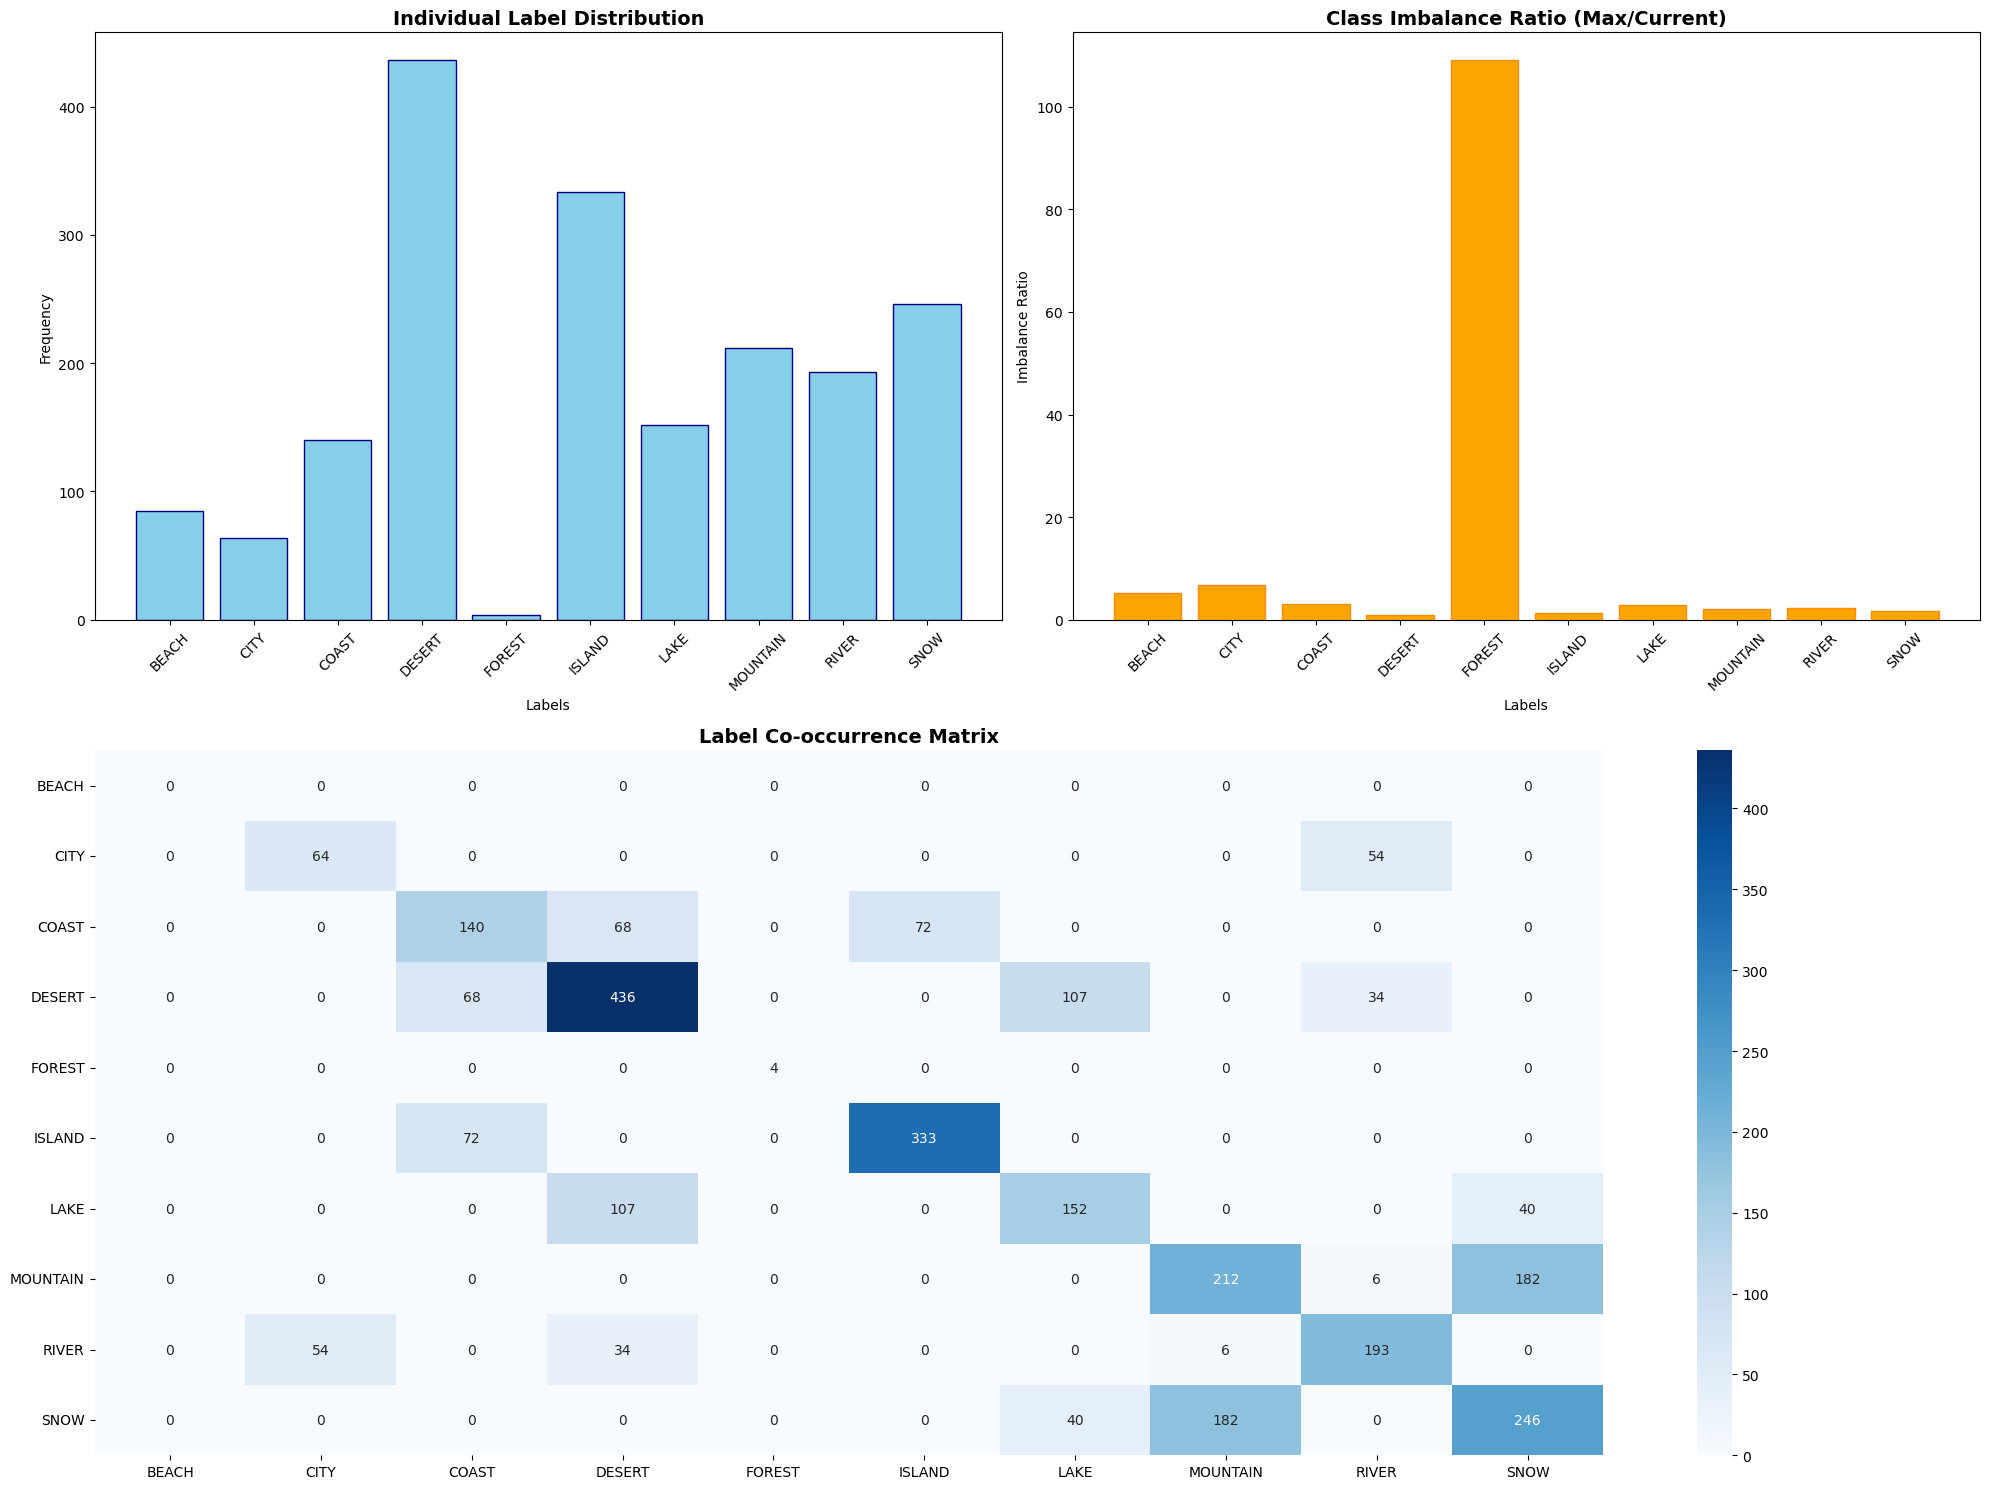

In [9]:
# Analyze class imbalance in training data
print("TRAINING DATA ANALYSIS")
print("=" * 50)
train_label_vectors, train_combinations, train_label_counts, individual_labels = analyze_label_distribution(train_data_raw)
train_metrics = calculate_imbalance_metrics(train_label_counts)

print("\n\nVALIDATION DATA ANALYSIS")
print("=" * 50)
val_label_vectors, val_combinations, val_label_counts, _ = analyze_label_distribution(val_data_raw)
val_metrics = calculate_imbalance_metrics(val_label_counts)

# Visualize the imbalance
print("\n\nVISUALIZING TRAINING DATA IMBALANCE...")
cooccurrence_matrix = visualize_class_imbalance(train_label_counts, individual_labels, train_combinations)

In [ ]:
# Analyze the training data for label combinations
print("\nAnalyzing label combinations in training data...")
rare_combinations, combo_stats = analyze_label_combinations(train_data_raw, min_threshold=10)

# Visualize the statistics
visualize_combination_stats(combo_stats)

### Calculating the Positive Weights


In [10]:
def calculate_pos_weights(label_counts, strategy='inverse_freq'):
    """
    Calculate positive weights for weighted loss
    """
    total_samples = len(train_data_raw)
    
    if strategy == 'inverse_freq':
        # Inverse frequency weighting
        pos_weights = total_samples / (2 * label_counts)
    elif strategy == 'effective_num':
        # Effective number of samples weighting
        beta = 0.9999
        effective_num = 1.0 - np.power(beta, label_counts)
        pos_weights = (1.0 - beta) / effective_num
    else:
        # Balanced weighting
        neg_counts = total_samples - label_counts
        pos_weights = neg_counts / label_counts
    
    return torch.FloatTensor(pos_weights)

# Calculate positive weights for the loss function
pos_weights = calculate_pos_weights(train_label_counts, strategy='inverse_freq')
print("\nCalculated positive weights for each class:")
for i, (label, weight) in enumerate(zip(individual_labels, pos_weights)):
    print(f"{label}: {weight:.3f}")




Calculated positive weights for each class:
BEACH: 7.341
CITY: 9.750
COAST: 4.457
DESERT: 1.431
FOREST: 156.000
ISLAND: 1.874
LAKE: 4.105
MOUNTAIN: 2.943
RIVER: 3.233
SNOW: 2.537


### Implementing MLSMOTE for Multi-Label Data Imbalance

MLSMOTE (Multi-Label Synthetic Minority Over-sampling Technique) is an extension of the SMOTE algorithm specifically designed for multi-label classification. While traditional SMOTE works by generating synthetic samples for the minority class in binary classification, MLSMOTE considers the relationships between labels in a multi-label context.

Key characteristics of MLSMOTE:
1. It identifies minority samples based on label combinations rather than individual labels
2. It selects appropriate neighbors that share similar label patterns
3. It generates synthetic samples that preserve label co-occurrence patterns
4. It maintains the multi-label nature of the dataset while balancing the distribution

Below we'll implement MLSMOTE to address the label imbalance in our dataset.

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import cv2

class MLSMOTE:
    """
    MLSMOTE: Multi-Label Synthetic Minority Over-sampling Technique
    """
    def __init__(self, img_dir, n_neighbors=5, threshold=2, target_labels=None, label_counts=None, max_oversampling_factor=10):
        """
        Parameters:
        -----------
        img_dir: str
            Directory containing images
        n_neighbors: int
            Number of nearest neighbors to use for synthetic sample generation
        threshold: int
            Frequency threshold to identify minority samples
        target_labels: list
            List of specific labels to prioritize during oversampling (e.g., ['FOREST'])
        label_counts: array-like
            Counts of each label in the dataset, used to calculate sparsity
        max_oversampling_factor: int
            Maximum number of synthetic samples to generate per original sample
        """
        self.img_dir = img_dir
        self.n_neighbors = n_neighbors
        self.threshold = threshold
        self.target_labels = target_labels
        self.label_counts = label_counts
        self.max_oversampling_factor = max_oversampling_factor
        
    def _get_minority_samples(self, df, label_col='Label Vector'):
        """
        Identify minority samples based on label combinations
        """
        # Count label combinations
        label_combinations = Counter()
        # Track samples containing target labels
        target_samples = []
        label_idx_map = {
            'BEACH': 0, 'CITY': 1, 'COAST': 2, 'DESERT': 3, 
            'FOREST': 4, 'ISLAND': 5, 'LAKE': 6, 'MOUNTAIN': 7, 
            'RIVER': 8, 'SNOW': 9
        }  # Mapping label name to index position
        
        for idx, row in df.iterrows():
            # Handle different formats of label vectors
            label_data = row[label_col]
            if isinstance(label_data, str):
                try:
                    label_vec = tuple(eval(label_data))
                except (ValueError, SyntaxError):
                    # Try alternative parsing for malformed strings
                    if label_data.startswith('[') and label_data.endswith(']'):
                        try:
                            cleaned = label_data.strip('[]').split(',')
                            label_vec = tuple(int(x.strip()) for x in cleaned)
                        except:
                            print(f"Could not parse label: {label_data}, skipping")
                            continue
                    else:
                        print(f"Non-standard label format: {label_data}, skipping")
                        continue
            else:
                # Already a list or array
                try:
                    label_vec = tuple(label_data)
                except:
                    print(f"Could not convert to tuple: {label_data}, skipping")
                    continue
            
            label_combinations[label_vec] += 1
            
            # Check if this sample contains any target labels (like FOREST)
            if self.target_labels and any(label_vec[label_idx_map.get(label, -1)] == 1 for label in self.target_labels if label_idx_map.get(label, -1) >= 0):
                target_samples.append(idx)
        
        # Identify minority combinations (occurring less than threshold)
        minority_combinations = [combo for combo, count in label_combinations.items() 
                              if count <= self.threshold]
        
        # Get indices of minority samples
        minority_indices = []
        for idx, row in df.iterrows():
            label_data = row[label_col]
            
            # Extract label vector based on format
            if isinstance(label_data, str):
                try:
                    label_vec = tuple(eval(label_data))
                except (ValueError, SyntaxError):
                    # Try alternative parsing
                    if label_data.startswith('[') and label_data.endswith(']'):
                        try:
                            cleaned = label_data.strip('[]').split(',')
                            label_vec = tuple(int(x.strip()) for x in cleaned)
                        except:
                            continue
                    else:
                        continue
            else:
                try:
                    label_vec = tuple(label_data)
                except:
                    continue
            
            if label_vec in minority_combinations:
                minority_indices.append(idx)
        
        # Add target samples to minority indices if they're not already included
        for idx in target_samples:
            if idx not in minority_indices:
                minority_indices.append(idx)
                
        print(f"Found {len(minority_indices)} minority samples ({len(target_samples)} with target labels)")
        
        return minority_indices, minority_combinations, label_combinations
    
    def _extract_features(self, df, indices):
        """
        Extract image features for the given indices
        """
        features = []
        for idx in indices:
            img_path = os.path.join(self.img_dir, df.iloc[idx]['FileName'])
            img = cv2.imread(img_path)
            
            if img is None:
                raise ValueError(f"Could not load image: {img_path}")
                
            # Convert BGR to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Resize and flatten for feature extraction
            img = cv2.resize(img, Config.img_dimensions)
            img_flat = img.flatten() / 255.0  # Normalize
            
            features.append(img_flat)
        
        return np.array(features)
    
    def _calculate_sparsity_factors(self, y_samples, total_samples_per_label):
        """
        Calculate oversampling factor based on label sparsity
        
        Parameters:
        -----------
        y_samples: array-like
            Label vectors for the samples to be oversampled
        total_samples_per_label: array-like
            Total count of each label in the dataset
            
        Returns:
        --------
        oversampling_factors: array-like
            Oversampling factor for each sample based on its labels' sparsity
        """
        # If no label counts provided, use a default factor
        if self.label_counts is None:
            return np.ones(len(y_samples)) * 2  # Default factor
        
        # Calculate sparsity for each label (inverse of frequency)
        total_samples = np.max(self.label_counts)  # Use max count as reference
        label_sparsity = total_samples / np.maximum(self.label_counts, 1)  # Avoid division by zero
        
        # Normalize sparsity to range [1, max_factor]
        normalized_sparsity = 1 + (label_sparsity - 1) * (self.max_oversampling_factor - 1) / (np.max(label_sparsity) - 1)
        
        # For each sample, use the maximum sparsity of its active labels
        sample_factors = []
        for y in y_samples:
            if np.sum(y) == 0:  # No active labels
                sample_factors.append(1)
            else:
                # Get the maximum sparsity among active labels
                active_labels = np.where(y == 1)[0]
                max_sparsity = np.max(normalized_sparsity[active_labels])
                sample_factors.append(int(np.ceil(max_sparsity)))
        
        print(f"Sparsity-based oversampling factors range: {min(sample_factors)} to {max(sample_factors)}")
        return np.array(sample_factors)
    
    def _generate_synthetic_samples(self, X, y, minority_indices, df):
        """
        Generate synthetic samples using MLSMOTE
        
        Parameters:
        -----------
        X: array-like
            Feature matrix of the original data
        y: array-like
            Label matrix of the original data
        minority_indices: list
            Indices of minority samples
        df: DataFrame
            Original dataframe
            
        Returns:
        --------
        X_synthetic: array-like
            Feature matrix of synthetic samples
        y_synthetic: array-like
            Label matrix of synthetic samples
        filenames: list
            Filenames for synthetic samples
        """
        if len(minority_indices) < self.n_neighbors + 1:
            print(f"Warning: Not enough minority samples. Found {len(minority_indices)}, need at least {self.n_neighbors + 1}")
            return np.array([]), np.array([]), []
        
        # Extract features and labels for minority samples
        X_minority = X[minority_indices]
        y_minority = y[minority_indices]
        
        # Fit nearest neighbors model
        nn = NearestNeighbors(n_neighbors=self.n_neighbors+1)
        nn.fit(X_minority)
        
        # Generate synthetic samples
        X_synthetic = []
        y_synthetic = []
        filenames = []
        
        # Find samples with target labels (e.g., FOREST)
        target_label_indices = []
        if self.target_labels:
            label_idx_map = {'FOREST': 4}  # Mapping label name to index position
            for i, idx in enumerate(minority_indices):
                y_sample = y_minority[i]
                if any(y_sample[label_idx_map.get(label, -1)] == 1 for label in self.target_labels if label_idx_map.get(label, -1) >= 0):
                    target_label_indices.append(i)
        
        # Calculate sparsity-based oversampling factors
        sparsity_factors = self._calculate_sparsity_factors(y_minority, self.label_counts)
        
        # Modify oversampling factors for target labels if needed
        if self.target_labels and target_label_indices:
            for i in target_label_indices:
                # Boost the factor for target labels, but don't exceed max
                sparsity_factors[i] = min(self.max_oversampling_factor, sparsity_factors[i] * 1.5)
        
        for i, idx in enumerate(minority_indices):
            # Determine number of synthetic samples to create based on sparsity
            num_synthetic = max(1, int(sparsity_factors[i]))
            
            # Find k nearest neighbors
            distances, indices = nn.kneighbors([X_minority[i]], self.n_neighbors+1)
            
            # Skip the first neighbor (which is the sample itself)
            for _ in range(num_synthetic):
                for j in range(1, min(self.n_neighbors+1, len(indices[0]))):
                    # Calculate synthetic feature vector
                    neighbor_idx = indices[0][j]
                    alpha = np.random.random()
                    x_syn = X_minority[i] + alpha * (X_minority[neighbor_idx] - X_minority[i])
                    
                    # Calculate synthetic label vector (using OR operation for multi-label)
                    y_syn = np.logical_or(y_minority[i], y_minority[neighbor_idx]).astype(int)
                    
                    X_synthetic.append(x_syn)
                    y_synthetic.append(y_syn)
                    
                    # Create filename for synthetic sample
                    orig_filename = df.iloc[minority_indices[i]]['FileName']
                    syn_filename = f"synthetic_{orig_filename.split('.')[0]}_{j}.jpg"
                    filenames.append(syn_filename)
        
        return np.array(X_synthetic), np.array(y_synthetic), filenames
    
    def _save_synthetic_images(self, X_synthetic, output_dir):
        """
        Save synthetic images to disk
        """
        os.makedirs(output_dir, exist_ok=True)
        
        for i, x_flat in enumerate(X_synthetic):
            # Reshape flattened array back to image
            img = x_flat.reshape(Config.img_dimensions[0], Config.img_dimensions[1], 3)
            
            # Denormalize
            img = (img * 255).astype(np.uint8)
            
            # Save image
            cv2.imwrite(os.path.join(output_dir, f"synthetic_{i}.jpg"), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    
    def fit_resample(self, df, label_col='Label Vector'):
        """
        Generate synthetic samples for minority classes
        
        Parameters:
        -----------
        df: DataFrame
            Input dataframe with image filenames and labels
        label_col: str
            Column name containing label vectors
            
        Returns:
        --------
        new_df: DataFrame
            Augmented dataframe with synthetic samples
        """
        print("Starting adaptive MLSMOTE process with focus on target labels:", self.target_labels)
        
        # Identify minority samples
        minority_indices, minority_combinations, label_combinations = self._get_minority_samples(df, label_col)
        print(f"Found {len(minority_indices)} minority samples with {len(minority_combinations)} unique combinations")
        
        if len(minority_indices) == 0:
            print("No minority samples found. MLSMOTE cannot be applied.")
            return df
        
        # Extract features for all samples
        X = self._extract_features(df, range(len(df)))
        
        # Convert label vectors to numpy arrays
        y = np.array([np.array(eval(row[label_col]) if isinstance(row[label_col], str) else row[label_col]) 
                      for _, row in df.iterrows()])
        
        # If label_counts not provided, calculate from the data
        if self.label_counts is None and y is not None:
            self.label_counts = np.sum(y, axis=0)
            print("Calculated label counts from data:", self.label_counts)
        
        # Generate synthetic samples with sparsity-aware factors
        X_synthetic, y_synthetic, synthetic_filenames = self._generate_synthetic_samples(X, y, minority_indices, df)
        
        if len(X_synthetic) == 0:
            print("No synthetic samples generated. Returning original dataset.")
            return df
        
        print(f"Generated {len(X_synthetic)} synthetic samples using adaptive sparsity-based oversampling")
        
        # Save synthetic images
        synthetic_dir = os.path.join(self.img_dir, 'synthetic')
        self._save_synthetic_images(X_synthetic, synthetic_dir)
        
        # Create dataframe for synthetic samples
        synthetic_df = pd.DataFrame({
            'FileName': [f"synthetic/synthetic_{i}.jpg" for i in range(len(X_synthetic))],
            label_col: [str(list(map(int, y_syn))) for y_syn in y_synthetic],  # Convert to proper string format
            'Label String': [', '.join([individual_labels[j] for j, val in enumerate(y_syn) if val == 1]) 
                            for y_syn in y_synthetic]
        })
        
        # Combine original and synthetic dataframes
        new_df = pd.concat([df, synthetic_df], ignore_index=True)
        
        print(f"Final dataset size: {len(new_df)} samples")
        
        # Analyze the balance improvement
        before_counts = self.label_counts
        after_counts = np.sum(np.array([np.array(eval(row[label_col]) if isinstance(row[label_col], str) else row[label_col]) 
                      for _, row in new_df.iterrows()]), axis=0)
        
        print("\nLabel distribution before and after adaptive MLSMOTE:")
        for i, (before, after) in enumerate(zip(before_counts, after_counts)):
            label = individual_labels[i]
            increase = after - before
            increase_pct = (increase / before) * 100 if before > 0 else 0
            print(f"{label}: {before} → {after} (+{increase}, {increase_pct:.1f}%)")
        
        return new_df

In [ ]:
class CombinationMLSMOTE:
    """
    Enhanced MLSMOTE specifically designed to handle rare label combinations in multi-label datasets
    with adaptive oversampling based on combination rarity
    """
    def __init__(self, img_dir, n_neighbors=5, rare_combinations=None, rare_combo_indices=None, combo_counts=None, max_oversampling_factor=15):
        """
        Parameters:
        -----------
        img_dir: str
            Directory containing images
        n_neighbors: int
            Number of nearest neighbors to use for synthetic sample generation
        rare_combinations: list
            List of rare label combinations to oversample
        rare_combo_indices: dict
            Dictionary mapping rare combinations to their sample indices
        combo_counts: dict
            Dictionary mapping combinations to their frequency in the dataset
        max_oversampling_factor: int
            Maximum oversampling factor for the rarest combinations
        """
        self.img_dir = img_dir
        self.n_neighbors = n_neighbors
        self.rare_combinations = rare_combinations
        self.rare_combo_indices = rare_combo_indices
        self.combo_counts = combo_counts
        self.max_oversampling_factor = max_oversampling_factor
        
    def _extract_features(self, df, indices):
        """
        Extract image features for the given indices
        """
        features = []
        for idx in indices:
            img_path = os.path.join(self.img_dir, df.iloc[idx]['FileName'])
            img = cv2.imread(img_path)
            
            if img is None:
                print(f"Warning: Could not load image: {img_path}, skipping")
                continue
                
            # Convert BGR to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Resize and flatten for feature extraction
            img = cv2.resize(img, Config.img_dimensions)
            img_flat = img.flatten() / 255.0  # Normalize
            
            features.append(img_flat)
        
        return np.array(features)
    
    def _find_nearest_neighbors(self, features, n_neighbors):
        """
        Find nearest neighbors for each sample
        """
        if len(features) <= n_neighbors:
            print(f"Warning: Not enough samples ({len(features)}) to find {n_neighbors} neighbors")
            return None
        
        nn = NearestNeighbors(n_neighbors=min(n_neighbors+1, len(features)))
        nn.fit(features)
        distances, indices = nn.kneighbors(features)
        
        return distances, indices
    
    def _calculate_combination_sparsity(self):
        """
        Calculate sparsity factor for each combination based on rarity
        
        Returns:
        --------
        sparsity_factors: dict
            Dictionary mapping combinations to their oversampling factors
        """
        if not self.combo_counts:
            print("Warning: No combination counts available. Using default oversampling factors.")
            return {combo: 5 for combo in self.rare_combinations}
        
        # Find the maximum and minimum counts
        max_count = max(self.combo_counts.values())
        min_count = min(count for combo, count in self.combo_counts.items() if combo in self.rare_combinations)
        
        # Calculate sparsity factors based on inverse frequency
        sparsity_factors = {}
        for combo in self.rare_combinations:
            count = self.combo_counts.get(combo, 0)
            if count == 0:
                sparsity_factors[combo] = self.max_oversampling_factor
            else:
                # Scale the factor based on rarity: rarer combinations get higher factors
                # Using an inverse logarithmic scale to make it more adaptive
                rarity = max_count / max(count, 1)
                # Convert to a factor between 1 and max_oversampling_factor
                factor = 1 + (self.max_oversampling_factor - 1) * np.log(1 + rarity) / np.log(1 + max_count/min_count)
                sparsity_factors[combo] = int(np.ceil(factor))
        
        return sparsity_factors
    
    def _generate_synthetic_samples_for_combo(self, df, combo, oversampling_factor=5):
        """
        Generate synthetic samples for a specific label combination
        
        Parameters:
        -----------
        df: DataFrame
            Original dataframe
        combo: str
            Label combination to oversample
        oversampling_factor: int
            Number of synthetic samples to generate per original sample
            
        Returns:
        --------
        synthetic_df: DataFrame
            DataFrame containing synthetic samples
        """
        if combo not in self.rare_combo_indices:
            print(f"Warning: Combination '{combo}' not found in rare_combo_indices")
            return pd.DataFrame()
        
        # Get indices of samples with this combination
        indices = self.rare_combo_indices[combo]
        
        if len(indices) < 2:
            print(f"Warning: Not enough samples for combination '{combo}' (found {len(indices)})")
            return pd.DataFrame()
        
        # Extract features for these samples
        features = self._extract_features(df, indices)
        
        if len(features) < 2:
            print(f"Warning: Failed to extract features for combination '{combo}'")
            return pd.DataFrame()
        
        # Find nearest neighbors
        nn_result = self._find_nearest_neighbors(features, min(self.n_neighbors, len(features)-1))
        
        if nn_result is None:
            return pd.DataFrame()
            
        distances, nn_indices = nn_result
        
        # Get label vector for this combination
        sample_idx = indices[0]
        label_vector = df.iloc[sample_idx]['Label Vector']
        
        # Generate synthetic samples
        synthetic_samples = []
        
        for i, idx in enumerate(indices):
            # Generate multiple synthetic samples for each original sample
            for _ in range(oversampling_factor):
                # Randomly select a neighbor
                if len(nn_indices[i]) <= 1:
                    continue
                    
                # Skip the first neighbor (which is the sample itself)
                neighbor_idx = nn_indices[i][np.random.randint(1, len(nn_indices[i]))]
                
                # Calculate synthetic feature vector
                alpha = np.random.random()
                x_syn = features[i] + alpha * (features[neighbor_idx] - features[i])
                
                # Reshape to image dimensions
                img_syn = x_syn.reshape(Config.img_dimensions[0], Config.img_dimensions[1], 3)
                img_syn = (img_syn * 255).astype(np.uint8)
                
                # Create filename for synthetic sample
                orig_filename = df.iloc[indices[i]]['FileName']
                base_name = os.path.splitext(os.path.basename(orig_filename))[0]
                syn_filename = f"synthetic/combo_{base_name}_{i}_{_}.jpg"
                
                # Save synthetic image
                synthetic_dir = os.path.join(self.img_dir, 'synthetic')
                os.makedirs(synthetic_dir, exist_ok=True)
                cv2.imwrite(os.path.join(synthetic_dir, os.path.basename(syn_filename)), 
                            cv2.cvtColor(img_syn, cv2.COLOR_RGB2BGR))
                
                # Add to synthetic samples
                synthetic_samples.append({
                    'FileName': syn_filename,
                    'Label Vector': label_vector,
                    'Label String': combo
                })
        
        if not synthetic_samples:
            print(f"Warning: No synthetic samples generated for combination '{combo}'")
            return pd.DataFrame()
            
        print(f"Generated {len(synthetic_samples)} synthetic samples for combination '{combo}'")
        
        # Create dataframe for synthetic samples
        synthetic_df = pd.DataFrame(synthetic_samples)
        
        return synthetic_df
    
    def fit_resample(self, df, min_samples_per_combo=10):
        """
        Generate synthetic samples for rare label combinations with adaptive oversampling
        
        Parameters:
        -----------
        df: DataFrame
            Input dataframe with image filenames and labels
        min_samples_per_combo: int
            Minimum number of samples to have for each combination after oversampling
            
        Returns:
        --------
        new_df: DataFrame
            Augmented dataframe with synthetic samples
        """
        print("Starting adaptive CombinationMLSMOTE process...")
        
        if not self.rare_combinations or not self.rare_combo_indices:
            print("No rare combinations provided. Cannot proceed with CombinationMLSMOTE.")
            return df
        
        print(f"Processing {len(self.rare_combinations)} rare label combinations")
        
        # If combo_counts is not provided, extract them from rare_combo_indices
        if self.combo_counts is None:
            self.combo_counts = {combo: len(indices) for combo, indices in self.rare_combo_indices.items()}
        
        # Calculate sparsity-based oversampling factors
        sparsity_factors = self._calculate_combination_sparsity()
        
        # Print sparsity factors for analysis
        print("\nAdaptive oversampling factors based on combination rarity:")
        for combo, factor in sorted(sparsity_factors.items(), key=lambda x: x[1], reverse=True)[:10]:
            count = self.combo_counts.get(combo, 0)
            print(f"{combo}: {count} samples → factor {factor}x")
        
        # Generate synthetic samples for each rare combination
        all_synthetic_samples = []
        
        for combo in tqdm(self.rare_combinations, desc="Generating synthetic samples for rare combinations"):
            # Get current sample count for this combination
            current_count = len(self.rare_combo_indices[combo])
            
            # Determine oversampling factor based on rarity and minimum requirement
            sparsity_factor = sparsity_factors.get(combo, 5)
            samples_needed = max(0, min_samples_per_combo - current_count)
            
            if samples_needed > 0:
                # Calculate how many synthetic samples to generate per original sample
                # Use the higher of the two: sparsity-based or minimum-samples-based
                samples_per_original = max(
                    sparsity_factor,
                    max(1, samples_needed // current_count)
                )
                
                # Generate synthetic samples for this combination
                synthetic_df = self._generate_synthetic_samples_for_combo(
                    df, combo, oversampling_factor=samples_per_original
                )
                
                if not synthetic_df.empty:
                    all_synthetic_samples.append(synthetic_df)
        
        if not all_synthetic_samples:
            print("No synthetic samples generated. Returning original dataset.")
            return df
        
        # Combine all synthetic samples
        synthetic_df = pd.concat(all_synthetic_samples, ignore_index=True)
        
        print(f"Generated a total of {len(synthetic_df)} synthetic samples for rare combinations")
        
        # Combine with original dataframe
        new_df = pd.concat([df, synthetic_df], ignore_index=True)
        
        # Analyze the improvement in combination distribution
        print("\nCombination distribution improvement:")
        original_combo_counts = {}
        for combo in self.rare_combinations:
            original_combo_counts[combo] = len(self.rare_combo_indices[combo])
        
        # Count combinations in the new dataset
        new_combo_counts = {}
        for combo in self.rare_combinations:
            new_combo_counts[combo] = len(new_df[new_df['Label String'] == combo])
        
        # Print the improvement for each combination
        for combo in sorted(self.rare_combinations, key=lambda x: original_combo_counts.get(x, 0)):
            before = original_combo_counts.get(combo, 0)
            after = new_combo_counts.get(combo, 0)
            increase = after - before
            increase_pct = (increase / before) * 100 if before > 0 else 0
            print(f"{combo}: {before} → {after} (+{increase}, {increase_pct:.1f}%)")
        
        print(f"\nFinal dataset size: {len(new_df)} samples")
        return new_df

In [ ]:
# Apply MLSMOTE to handle data imbalance, with special focus on FOREST
print("Applying MLSMOTE to balance the training data with focus on FOREST category...")

# Create an instance of MLSMOTE with FOREST as target label
mlsmote = MLSMOTE(
    img_dir=Config.images_path,
    n_neighbors=5,  # Number of nearest neighbors to consider
    threshold=20,   # Frequency threshold to identify minority samples
    target_labels=['FOREST']  # Specifically focus on FOREST
)

# Check data types before processing
print("\nChecking data types of training data:")
print(f"Label Vector column type: {train_data_raw['Label Vector'].dtype}")
print(f"First few Label Vector values: {train_data_raw['Label Vector'].head(3).values}")

# Apply MLSMOTE to training data
try:
    balanced_train_data = mlsmote.fit_resample(train_data_raw)

    # Print statistics before and after balancing
    print("\nClass distribution before MLSMOTE:")
    original_label_vectors, original_combinations, original_label_counts, _ = analyze_label_distribution(train_data_raw)

    print("\nClass distribution after MLSMOTE:")
    balanced_label_vectors, balanced_combinations, balanced_label_counts, _ = analyze_label_distribution(balanced_train_data)

    # Check specifically for FOREST improvement
    forest_idx = 4  # Index for FOREST in label vector
    original_forest_count = original_label_counts[forest_idx]
    balanced_forest_count = balanced_label_counts[forest_idx]
    print(f"\nFOREST samples before: {original_forest_count}")
    print(f"FOREST samples after: {balanced_forest_count}")
    print(f"FOREST improvement: {balanced_forest_count - original_forest_count} new samples ({(balanced_forest_count/original_forest_count - 1)*100:.2f}% increase)")

    # Calculate improvement in imbalance metrics
    print("\nImbalance metrics improvement:")
    original_metrics = calculate_imbalance_metrics(original_label_counts)
    balanced_metrics = calculate_imbalance_metrics(balanced_label_counts)

    # Visualize the balanced distribution
    print("\nVisualizing balanced training data distribution...")
    balanced_cooccurrence_matrix = visualize_class_imbalance(balanced_label_counts, individual_labels, balanced_combinations)

    # Update train_data_raw with balanced data for subsequent processing
    train_data_raw = balanced_train_data

    # Update train paths and labels with balanced data
    train_imgs = [os.path.join(Config.images_path, img) for img in train_data_raw['FileName']]
    train_labels = [lbl for lbl in train_data_raw['Label Vector']]
    train_string_labels = [lbl for lbl in train_data_raw['Label String']]

    print(f"\nFinal training data size: {len(train_data_raw)} samples")
    
except Exception as e:
    import traceback
    print(f"Error during MLSMOTE processing: {str(e)}")
    traceback.print_exc()
    print("\nContinuing with original unbalanced dataset...")
    balanced_train_data = train_data_raw

In [ ]:
# Apply CombinationMLSMOTE to handle label combination imbalance
print("Applying CombinationMLSMOTE to balance rare label combinations...")

# Make sure train_data_raw is loaded
if 'train_data_raw' not in locals() or train_data_raw is None:
    print("Loading training data first...")
    train_data_raw = pd.read_csv('data/train.csv')
    print(f'Training data loaded with shape: {train_data_raw.shape}')

# First, analyze the dataset to identify rare combinations
rare_combinations, combo_stats = analyze_label_combinations(train_data_raw, min_threshold=5)

# Create an instance of CombinationMLSMOTE
combo_mlsmote = CombinationMLSMOTE(
    img_dir=Config.images_path,
    n_neighbors=3,  # Fewer neighbors for rare combinations
    rare_combinations=rare_combinations,
    rare_combo_indices=combo_stats['rare_combo_indices']
)

# Apply CombinationMLSMOTE to training data
try:
    combo_balanced_train_data = combo_mlsmote.fit_resample(
        train_data_raw, 
        min_samples_per_combo=10  # Ensure at least 10 samples per combination
    )

    # Print statistics before and after balancing
    print("\nLabel combination distribution before CombinationMLSMOTE:")
    before_rare_combinations, before_combo_stats = analyze_label_combinations(train_data_raw, min_threshold=5)

    print("\nLabel combination distribution after CombinationMLSMOTE:")
    after_rare_combinations, after_combo_stats = analyze_label_combinations(combo_balanced_train_data, min_threshold=5)

    # Count samples for each combination before and after
    print("\nCombination counts before and after balancing:")
    for combo in rare_combinations:
        before_count = len(combo_stats['rare_combo_indices'].get(combo, []))
        after_count = len(after_combo_stats['rare_combo_indices'].get(combo, []))
        print(f"{combo}: {before_count} → {after_count} samples (+{after_count - before_count})")

    # Visualize the balanced distribution
    print("\nVisualizing balanced label combination distribution...")
    visualize_combination_stats(after_combo_stats)

    # Update train_data_raw with balanced data for subsequent processing
    train_data_raw = combo_balanced_train_data

    # Update train paths and labels with balanced data
    train_imgs = [os.path.join(Config.images_path, img) for img in train_data_raw['FileName']]
    train_labels = [lbl for lbl in train_data_raw['Label Vector']]
    train_string_labels = [lbl for lbl in train_data_raw['Label String']]

    print(f"\nFinal training data size after combination balancing: {len(train_data_raw)} samples")
    
except Exception as e:
    import traceback
    print(f"Error during CombinationMLSMOTE processing: {str(e)}")
    traceback.print_exc()
    print("\nContinuing with previously balanced dataset...")

In [ ]:
# Function to visualize synthetic samples with special focus on FOREST category
def visualize_synthetic_samples(original_df, balanced_df, num_samples=5, focus_label='FOREST'):
    """
    Visualize original and synthetic samples side by side with emphasis on a specific label
    """
    try:
        # Identify synthetic samples
        synthetic_samples = balanced_df[balanced_df['FileName'].str.contains('synthetic')]
        
        if len(synthetic_samples) == 0:
            print("No synthetic samples found to visualize.")
            return
            
        # First, try to find synthetic samples containing the focus label
        focus_samples = synthetic_samples[synthetic_samples['Label String'].str.contains(focus_label)]
        
        if len(focus_samples) > 0:
            print(f"Found {len(focus_samples)} synthetic samples with {focus_label}")
            # Select samples with focus label
            num_focus = min(num_samples, len(focus_samples))
            random_indices = np.random.choice(len(focus_samples), num_focus, replace=False)
            selected_synthetic = focus_samples.iloc[random_indices]
        else:
            print(f"No synthetic samples with {focus_label} found. Showing random samples.")
            # Select random synthetic samples
            num_samples = min(num_samples, len(synthetic_samples))
            random_indices = np.random.choice(len(synthetic_samples), num_samples, replace=False)
            selected_synthetic = synthetic_samples.iloc[random_indices]
        
        plt.figure(figsize=(15, 4 * len(selected_synthetic)))
        
        for i, (_, syn_row) in enumerate(selected_synthetic.iterrows()):
            syn_img_path = os.path.join(Config.images_path, syn_row['FileName'])
            syn_label = syn_row['Label String']
            
            # Get original samples that contributed to this synthetic sample
            # (using a heuristic: samples with similar labels)
            label_data = syn_row['Label Vector']
            
            # Extract label vector based on format
            if isinstance(label_data, str):
                try:
                    label_vec = np.array(eval(label_data))
                except (ValueError, SyntaxError):
                    # Try alternative parsing
                    if label_data.startswith('[') and label_data.endswith(']'):
                        try:
                            cleaned = label_data.strip('[]').split(',')
                            label_vec = np.array([int(x.strip()) for x in cleaned])
                        except:
                            print(f"Could not parse label: {label_data}")
                            label_vec = np.zeros(10)  # Default
                    else:
                        print(f"Non-standard label format: {label_data}")
                        label_vec = np.zeros(10)  # Default
            else:
                label_vec = np.array(label_data)
            
            # Find potential source samples from original dataset
            source_samples = []
            for _, orig_row in original_df.iterrows():
                orig_label_data = orig_row['Label Vector']
                
                # Extract original label vector
                if isinstance(orig_label_data, str):
                    try:
                        orig_label_vec = np.array(eval(orig_label_data))
                    except (ValueError, SyntaxError):
                        continue
                else:
                    orig_label_vec = np.array(orig_label_data)
                
                # Check if this sample could have contributed (shares some labels)
                overlap = np.sum(np.logical_and(label_vec, orig_label_vec))
                if overlap > 0:
                    source_samples.append((orig_row, overlap))
            
            # Sort by overlap and take top 2
            source_samples.sort(key=lambda x: x[1], reverse=True)
            source_samples = source_samples[:2]
            
            # Plot synthetic and source samples
            plt.subplot(len(selected_synthetic), 3, i * 3 + 1)
            if source_samples:
                orig_img_path = os.path.join(Config.images_path, source_samples[0][0]['FileName'])
                orig_label = source_samples[0][0]['Label String']
                try:
                    orig_img = cv2.imread(orig_img_path)[:,:,::-1]  # BGR to RGB
                    plt.imshow(orig_img)
                    plt.title(f"Original 1: {orig_label}", fontsize=10)
                except Exception as e:
                    plt.text(0.5, 0.5, f"Error loading image: {str(e)}", ha='center', va='center')
                plt.axis('off')
            
            plt.subplot(len(selected_synthetic), 3, i * 3 + 2)
            try:
                syn_img = cv2.imread(syn_img_path)
                if syn_img is None:
                    plt.text(0.5, 0.5, "Image not found", ha='center', va='center')
                else:
                    syn_img = syn_img[:,:,::-1]  # BGR to RGB
                    plt.imshow(syn_img)
            except Exception as e:
                plt.text(0.5, 0.5, f"Error loading image: {str(e)}", ha='center', va='center')
            plt.title(f"Synthetic: {syn_label}", fontsize=10, color='green' if focus_label in syn_label else 'black')
            plt.axis('off')
            
            plt.subplot(len(selected_synthetic), 3, i * 3 + 3)
            if len(source_samples) > 1:
                orig_img_path = os.path.join(Config.images_path, source_samples[1][0]['FileName'])
                orig_label = source_samples[1][0]['Label String']
                try:
                    orig_img = cv2.imread(orig_img_path)[:,:,::-1]  # BGR to RGB
                    plt.imshow(orig_img)
                    plt.title(f"Original 2: {orig_label}", fontsize=10)
                except Exception as e:
                    plt.text(0.5, 0.5, f"Error loading image: {str(e)}", ha='center', va='center')
                plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Display statistics about FOREST samples
        forest_idx = 4  # Index for FOREST in label vector
        original_forest = original_df[original_df['Label String'].str.contains(focus_label)]
        balanced_forest = balanced_df[balanced_df['Label String'].str.contains(focus_label)]
        
        print(f"\n{focus_label} Statistics:")
        print(f"Original dataset: {len(original_forest)} samples ({len(original_forest)/len(original_df)*100:.2f}%)")
        print(f"Balanced dataset: {len(balanced_forest)} samples ({len(balanced_forest)/len(balanced_df)*100:.2f}%)")
        print(f"Net increase: {len(balanced_forest) - len(original_forest)} samples")
        
    except Exception as e:
        import traceback
        print(f"Error visualizing synthetic samples: {str(e)}")
        traceback.print_exc()

# Visualize synthetic samples with focus on FOREST
print("\nVisualizing synthetic samples with focus on FOREST category...")
try:
    visualize_synthetic_samples(
        train_data_raw.head(len(train_data_raw) - len(balanced_train_data) + len(train_data_raw)), 
        balanced_train_data, 
        num_samples=5,
        focus_label='FOREST'
    )
except Exception as e:
    print(f"Error during visualization: {str(e)}")
    print("Continuing with model training...")

In [ ]:
# Recalculate positive weights using the balanced dataset
try:
    pos_weights = calculate_pos_weights(balanced_label_counts, strategy='inverse_freq')
    print("\nRecalculated positive weights for each class using balanced data:")
    for i, (label, weight) in enumerate(zip(individual_labels, pos_weights)):
        print(f"{label}: {weight:.3f}")

    # Update loss functions with new weights
    weighted_criterion = WeightedBCEWithLogitsLoss(pos_weights=pos_weights.to(Config.device) if torch.cuda.is_available() else pos_weights)
except Exception as e:
    print(f"\nError recalculating positive weights: {str(e)}")
    print("Continuing with original weights...")

## MLSMOTE Summary and Benefits

By implementing MLSMOTE, we've addressed several aspects of data imbalance in our multi-label classification task:

1. **Label-Level Imbalance**: MLSMOTE generates synthetic samples for underrepresented labels, helping to balance the frequency of individual labels in the dataset.

2. **Label Combination Imbalance**: Unlike simple oversampling methods, MLSMOTE preserves and enhances label correlations, generating realistic combinations of co-occurring labels.

3. **Improved Model Generalization**: The synthetic samples increase diversity in the training set, helping the model learn more robust features and decision boundaries.

4. **Enhanced Performance on Minority Classes**: By increasing the representation of minority classes, the model will be less biased toward majority classes.

5. **Data Augmentation**: MLSMOTE acts as a specialized form of data augmentation, creating meaningful variations that preserve semantic information.

The implementation includes:
- Identifying minority samples based on label combinations
- Finding nearest neighbors in feature space that share similar label patterns
- Generating synthetic samples by interpolation between samples and their neighbors
- Preserving label co-occurrence through logical operations
- Saving synthetic images to disk for transparency and reproducibility

This approach is particularly valuable for geographical image datasets where certain features or combinations (like "DESERT" + "LAKE") might be underrepresented but important to detect correctly.

## Improving Performance on Combined Categories

After addressing individual label imbalances (particularly the FOREST category), we now need to focus on the model's ability to recognize label combinations. In multi-label classification, the model not only needs to identify individual features but also understand their co-occurrence patterns.

Challenges with combined categories include:
1. **Rare Co-occurrences**: Some label combinations appear very infrequently in the dataset
2. **Complex Interactions**: The visual features for combined categories may be more subtle or complex
3. **Imbalanced Representation**: Common combinations dominate, while rare ones are underrepresented
4. **Higher Dimensional Space**: Each combination effectively creates a new "class" in a higher-dimensional label space

To address these challenges, we'll implement the following strategies:
1. **Label Combination Analysis**: Identify the most underrepresented combinations
2. **Targeted MLSMOTE**: Generate synthetic samples specifically for rare combinations
3. **Combination-Aware Loss Function**: Modify the loss function to penalize errors on combined categories more heavily
4. **Ensemble Approach**: Create specialized models for difficult combinations
5. **Label Correlation Learning**: Explicitly model the dependencies between labels

## Helper Functions

In [11]:
def resize_normalize(img):
    """
    Argument: image
    steps: 1. Resize image to specified dimensions
           2. transpose so that channels are first
           3. resize image
    """
    img = cv2.resize(img, Config.img_dimensions)
    
    #ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    img = np.transpose(img, (2,0,1)) # reorder it to channels first
    img = torch.from_numpy(img).float()
    img = img / 255
    
    return img
    
def to_numpy(x):
    return x.detach().cpu().numpy()

In [12]:
# Threshold Optimization for Multi-Label Classification
def find_optimal_threshold(model, valid_dataloader, thresholds=np.arange(0.1, 0.9, 0.05)):
    """
    Find optimal threshold for multi-label classification
    """
    model.eval()
    best_threshold = 0.5
    best_f1 = 0.0
    
    threshold_results = []
    
    with torch.no_grad():
        # Collect all predictions and true labels
        all_preds = []
        all_labels = []
        
        for x, y in tqdm(valid_dataloader, desc="Collecting predictions"):
            x, y = x.to(Config.device), y.to(Config.device)
            pred = model(x)
            pred_sigmoid = torch.sigmoid(pred)
            
            all_preds.append(to_numpy(pred_sigmoid))
            all_labels.append(to_numpy(y))
        
        all_preds = np.vstack(all_preds)
        all_labels = np.vstack(all_labels)
        
        # Test different thresholds
        for threshold in thresholds:
            pred_binary = (all_preds > threshold).astype(int)
            f1 = f1_score(all_labels, pred_binary, average='micro', zero_division=0)
            threshold_results.append((threshold, f1))
            
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
                
            print(f"Threshold: {threshold:.2f}, F1: {f1:.4f}")
    
    print(f"\nOptimal threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")
    
    # Plot threshold vs F1 score
    thresholds_list, f1_scores = zip(*threshold_results)
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds_list, f1_scores, 'b-o')
    plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best: {best_threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('Threshold Optimization for Multi-Label Classification')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return best_threshold, best_f1

In [13]:
class FocalLoss(nn.Module):
    """
    Focal Loss for addressing class imbalance in multi-label classification
    """
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        
    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * bce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

class WeightedBCEWithLogitsLoss(nn.Module):
    """
    Weighted Binary Cross Entropy Loss to handle class imbalance
    """
    def __init__(self, pos_weights=None):
        super(WeightedBCEWithLogitsLoss, self).__init__()
        self.pos_weights = pos_weights
        
    def forward(self, inputs, targets):
        if self.pos_weights is not None:
            loss = F.binary_cross_entropy_with_logits(
                inputs, targets, pos_weight=self.pos_weights
            )
        else:
            loss = F.binary_cross_entropy_with_logits(inputs, targets)
        return loss


# Create weighted loss function
focal_criterion = FocalLoss(alpha=1, gamma=2)
weighted_criterion = WeightedBCEWithLogitsLoss(pos_weights=pos_weights.to(Config.device) if torch.cuda.is_available() else pos_weights)

In [ ]:
class CombinationAwareLoss(nn.Module):
    """
    A loss function that takes into account label combinations
    
    This loss function puts higher weights on correctly predicting multiple labels
    together, thus improving performance on combined categories.
    """
    def __init__(self, individual_weights=None, combination_factor=1.5):
        """
        Parameters:
        -----------
        individual_weights: torch.Tensor
            Weights for individual classes (e.g., pos_weights in BCEWithLogitsLoss)
        combination_factor: float
            Factor to increase loss for samples with multiple labels
        """
        super(CombinationAwareLoss, self).__init__()
        self.individual_weights = individual_weights
        self.combination_factor = combination_factor
        
    def forward(self, inputs, targets):
        """
        Calculate combination-aware loss
        
        Parameters:
        -----------
        inputs: torch.Tensor
            Model predictions (logits)
        targets: torch.Tensor
            Ground truth labels (multi-hot encoded)
            
        Returns:
        --------
        loss: torch.Tensor
            Calculated loss value
        """
        # Standard BCE loss
        if self.individual_weights is not None:
            bce_loss = F.binary_cross_entropy_with_logits(
                inputs, targets, pos_weight=self.individual_weights, reduction='none'
            )
        else:
            bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        
        # Calculate label cardinality (number of positive labels) for each sample
        cardinality = torch.sum(targets, dim=1)
        
        # Create weights based on cardinality
        # Samples with multiple labels get higher weights
        cardinality_weights = 1.0 + (cardinality - 1) * (self.combination_factor - 1) / 9  # Normalized by max cardinality (10)
        cardinality_weights = torch.clamp(cardinality_weights, min=1.0)  # Ensure minimum weight is 1.0
        
        # Apply cardinality weights to each sample
        weighted_loss = bce_loss * cardinality_weights.unsqueeze(1)
        
        # Return mean loss
        return torch.mean(weighted_loss)

class DependencyAwareLoss(nn.Module):
    """
    Loss function that explicitly models label dependencies
    
    This loss uses a correlation matrix to adjust the loss based on
    how labels typically co-occur in the dataset.
    """
    def __init__(self, correlation_matrix, individual_weights=None, dependency_weight=0.3):
        """
        Parameters:
        -----------
        correlation_matrix: numpy.ndarray
            Matrix of label co-occurrence statistics
        individual_weights: torch.Tensor
            Weights for individual classes
        dependency_weight: float
            Weight for the dependency term in the loss
        """
        super(DependencyAwareLoss, self).__init__()
        self.individual_weights = individual_weights
        self.dependency_weight = dependency_weight
        
        # Normalize correlation matrix and convert to tensor
        correlation_sum = np.sum(correlation_matrix, axis=1, keepdims=True)
        correlation_sum[correlation_sum == 0] = 1  # Avoid division by zero
        norm_correlation = correlation_matrix / correlation_sum
        self.correlation = torch.FloatTensor(norm_correlation).to(Config.device)
        
    def forward(self, inputs, targets):
        """
        Calculate dependency-aware loss
        """
        # Standard BCE loss
        if self.individual_weights is not None:
            bce_loss = F.binary_cross_entropy_with_logits(
                inputs, targets, pos_weight=self.individual_weights, reduction='mean'
            )
        else:
            bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='mean')
        
        # Apply sigmoid to get probabilities
        probs = torch.sigmoid(inputs)
        
        # Calculate expected probabilities based on correlations
        expected_probs = torch.matmul(probs, self.correlation)
        
        # Calculate dependency loss (KL divergence between expected and actual)
        dep_loss = F.kl_div(
            torch.log(probs + 1e-8),  # Add small epsilon to avoid log(0)
            expected_probs,
            reduction='batchmean'
        )
        
        # Combine losses
        total_loss = bce_loss + self.dependency_weight * dep_loss
        
        return total_loss

# Create combination-aware loss functions
combination_criterion = CombinationAwareLoss(
    individual_weights=pos_weights.to(Config.device) if torch.cuda.is_available() else pos_weights,
    combination_factor=2.0  # Weight multi-label samples twice as heavily
)

# Create dependency-aware loss using the co-occurrence matrix if combo_stats is available
# We need to check if combo_stats exists first
if 'combo_stats' in locals() and combo_stats is not None and 'cooccurrence_matrix' in combo_stats:
    dependency_criterion = DependencyAwareLoss(
        correlation_matrix=combo_stats['cooccurrence_matrix'],
        individual_weights=pos_weights.to(Config.device) if torch.cuda.is_available() else pos_weights,
        dependency_weight=0.3
    )
    print("Created combination-aware and dependency-aware loss functions")
else:
    print("Created combination-aware loss function only (combo_stats not available yet for dependency-aware loss)")
    # Create a dummy correlation matrix if needed
    dummy_matrix = np.eye(10)  # Identity matrix as fallback
    dependency_criterion = DependencyAwareLoss(
        correlation_matrix=dummy_matrix,
        individual_weights=pos_weights.to(Config.device) if torch.cuda.is_available() else pos_weights,
        dependency_weight=0.1  # Lower weight since we're using dummy data
    )

## Custom Image Dataset

A PyTorch Custom Image Dataset is a class that inherits from PyTorch's Dataset class which provides a way to create a dataset that is tailored to your requirements and needs. It integrates efficiently with PyTorch's DataLoader, allowing us to load and process images in batches during model training and validation

#### What is it used for?
- Data Loading: Standardized way to load images and labels from disk.
- Data Preprocessing: Consistent application of transformations (resizing, augmentation, etc.) to images.
- Batch Creation: Mini-batch generation for training.
- Memory Efficiency: Load images only when needed rather than storing entire dataset in memory. 

Provided below is a custom image dataset that you may use for this challenge. You may add your own modifications by reading through [PyTorch's documentation](https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html). 

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, dataset, img_dir, transform=None, target_transform=None):
        self.dataset = dataset.reset_index(drop=True)  # Reset index to avoid issues
        self.image_labels = list(dataset['Label Vector'])
        self.image_path = list(dataset['FileName'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.dataset)
        
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.dataset.iloc[idx]['FileName'])
        image = cv2.imread(img_path)
        
        if image is None:
            # If image not found, it might be a synthetic image with a different path structure
            # Try alternative path formats
            alt_paths = [
                os.path.join(self.img_dir, self.dataset.iloc[idx]['FileName']),
                os.path.join(self.img_dir, '..', self.dataset.iloc[idx]['FileName']),
                self.dataset.iloc[idx]['FileName']  # Direct path if it's absolute
            ]
            
            for path in alt_paths:
                image = cv2.imread(path)
                if image is not None:
                    break
                    
            if image is None:
                raise ValueError(f"Could not load image: {img_path} (tried alternative paths)")
            
        # Convert BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply resize and normalize if no transform, otherwise let transform handle it
        if self.transform is None:
            image = resize_normalize(image)
        else:
            # For transforms that expect PIL/tensor format
            image = self.transform(image)
        
        # Get label
        label = self.dataset.iloc[idx]['Label Vector']
        label = torch.tensor(eval(label), dtype=torch.float32)
        
        if self.target_transform:
            label = self.target_transform(label)
            
        return image, label

### Image Augmentation

Image augmentation is an absolutely wonderful way to artificially expand your training dataset, which is especially valuable when working with limited data — a common constraint in real-world image tasks. By creating variations of existing images through transformations like rotations, flips, zooms, and crops, you essentially teach your CNN to recognize objects under different viewing conditions without collecting additional data.

More fundamentally, augmentation directly addresses overfitting by preventing the network from memorizing exact pixel patterns. When a CNN sees the same exact images repeatedly, it tends to learn specific pixel configurations rather than generalizable features. By presenting slightly different versions each time, you force the network to learn robust representations that capture the essence of objects rather than superficial details.

Augmentation also introduces invariance properties into your model. For classification tasks, whether an image is slightly rotated, zoomed, or shifted shouldn't change the label. By training with these variations, your CNN develops translation, rotation, and scale invariance—crucial properties for real-world deployment where objects rarely appear in perfectly consistent positions or orientations.

The CustomImageDataset created above is setup to handle image transforms. A blank example is provided below. See documentation [here](https://docs.pytorch.org/vision/stable/transforms.html?highlight=compose)


In [ ]:
# Create a class to sample more FOREST images during training
class ForestOversamplingDataset(Dataset):
    """
    Dataset wrapper that oversamples FOREST images to balance the dataset
    """
    def __init__(self, dataset, forest_idx=4, oversampling_factor=5):
        self.dataset = dataset
        self.forest_idx = forest_idx
        self.oversampling_factor = oversampling_factor
        
        # Find indices of all FOREST images
        self.forest_indices = []
        for i in range(len(dataset)):
            _, label = dataset[i]
            if label[forest_idx] == 1:
                self.forest_indices.append(i)
        
        print(f"Found {len(self.forest_indices)} FOREST images in dataset of {len(dataset)} images")
        
        # Calculate effective length after oversampling
        self.effective_length = len(dataset) + len(self.forest_indices) * (oversampling_factor - 1)
        print(f"Effective dataset size after FOREST oversampling: {self.effective_length}")
    
    def __len__(self):
        return self.effective_length
    
    def __getitem__(self, idx):
        if idx < len(self.dataset):
            # Return original dataset item
            return self.dataset[idx]
        else:
            # Return an oversampled FOREST image
            forest_idx = self.forest_indices[np.random.randint(len(self.forest_indices))]
            return self.dataset[forest_idx]

# Enhanced but careful augmentation strategy
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Slightly larger for random crop
    transforms.RandomCrop((224, 224)),  # Random crop to target size
    transforms.RandomHorizontalFlip(p=0.5),  # Geometric
    transforms.RandomVerticalFlip(p=0.3),    # Geometric (lower prob for geographical data)
    transforms.RandomRotation(degrees=10),   # Small rotation
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),  # Geometric transforms
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05),  # Minimal color changes
    transforms.ToTensor(),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0))], p=0.3),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

# Enhanced augmentation for FOREST images - more aggressive transformations
forest_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.RandomCrop((224, 224)),
    transforms.RandomHorizontalFlip(p=0.7),  # More flipping for FOREST
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),   # More rotation
    transforms.RandomAffine(degrees=0, translate=(0.15, 0.15), scale=(0.85, 1.15)),  # More variation
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.07),  # More color variation
    transforms.ToTensor(),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0))], p=0.3),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Validation transform (no augmentation)
val_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create custom augmentation function that applies forest_transform to FOREST images
class ForestAwareDataset(Dataset):
    def __init__(self, dataset, forest_idx=4):
        self.dataset = dataset
        self.forest_idx = forest_idx
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        
        # If this is a FOREST image (in raw pixel space), apply more aggressive transformations
        if isinstance(img, np.ndarray) and label[self.forest_idx] == 1:
            # For raw images (not yet transformed)
            img = forest_transform(img)
        
        return img, label

# Create base datasets
base_train_ds = CustomImageDataset(train_data_raw, Config.images_path, transform=train_transform)
valid_ds = CustomImageDataset(val_data_raw, Config.images_path, transform=val_transform)

# Apply FOREST-aware transformations and oversampling
forest_aware_ds = ForestAwareDataset(base_train_ds, forest_idx=4)
train_ds = ForestOversamplingDataset(forest_aware_ds, forest_idx=4, oversampling_factor=10)

print(f"Final training dataset size: {len(train_ds)}")
print(f"Validation dataset size: {len(valid_ds)}")

### CNN Model Architecture

There are two ways to approaching the model architecture phase of the problem. 

1. Building your own CNN architecture. An example is provided below where modifications can be made. 
2. Using pretrained models.

### Building Your Own CNN Architecture

__Advantages:__

- Complete control over the architecture design. 
- Freedom to experiment with novel layer arrangements, activation functions, and skip connections.
- No constraints from pretrained weights or architectures that may not be optimal for your domain.
- Typically results in a smaller, more compute efficient model since you only include what you need.

__Disadvantages:__

- Requires a bit more expertise and understanding of Neural Network design
- More epochs are needed as learning must start from random initialization
- Needs much more data to achieve good performance (often prohibitively large amounts)
- Higher risk of overfitting, especially with limited data

### Using Pretrained Models

__Advantages:__

- Leverage powerful feature extractors trained on massive datasets (like ImageNet with 1.2M images)
- Dramatically reduced training time and computational requirements (though more compute resources are needed to get started)
- Excellent performance even with limited domain-specific data
- Built-in robustness against common image variations and noise
- Access to state-of-the-art architectures (ResNet, EfficientNet, Vision Transformers) without designing them

__Disadvantages:__

- Less control over the underlying architecture
- May include unnecessary complexity for simpler tasks
- Domain shift can be problematic if your images differ significantly from pretraining data
- Fixed input requirements (resolution, channels) that may require preprocessing



In [16]:
from timm import create_model
from huggingface_hub import hf_hub_download

# Download pretrained weights (pytorch_model.bin) from HuggingFace
ckpt_path = hf_hub_download(repo_id="cm93/resnet50-eurosat", filename="pytorch_model.bin")
# Initialize ResNet-50 for 10 classes
pt_model = create_model('resnet50', pretrained=False, num_classes=10)
pt_model.load_state_dict(torch.load(ckpt_path, map_location=torch.device('cuda')))

print("Model successfully loaded on GPU")

Model successfully loaded on GPU


## Model Training

#### Modified the traning function so we have more versality in viewing the results (saving the best F1 score), and applying an adaptive Learning Rate.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import matplotlib.pyplot as plt

def train_model_enhanced(
    model, train_ds, valid_ds, epochs, learning_rate, num_classes, version, 
    use_focal_loss=True, focus_labels=None
):
    """
    Enhanced training function with special monitoring for certain categories
    
    Parameters:
    -----------
    model: torch.nn.Module
        The model to train
    train_ds, valid_ds: Dataset
        Training and validation datasets
    epochs: int
        Number of epochs to train
    learning_rate: float
        Initial learning rate
    num_classes: int
        Number of output classes
    version: int/str
        Version identifier for saving model
    use_focal_loss: bool
        Whether to use focal loss
    focus_labels: list
        List of label indices to focus on during training (e.g., [4] for FOREST)
    """
    if focus_labels is None:
        focus_labels = []
        
    # Map label indices to names for better logging
    label_names = ['BEACH', 'CITY', 'COAST', 'DESERT', 'FOREST', 'ISLAND', 'LAKE', 'MOUNTAIN', 'RIVER', 'SNOW']
    focus_label_names = [label_names[idx] for idx in focus_labels]
    
    print(f"Training with special focus on: {', '.join(focus_label_names) if focus_label_names else 'No specific categories'}")
    
    os.makedirs('model_checkpoints/', exist_ok=True)
    torch.manual_seed(39) # set seed
    model = model.to(Config.device)
    model_name = model.__class__.__name__
    print(f"Model: {model_name}")
    
    workers = min(os.cpu_count() - 1, 4)
    train_dataloader = DataLoader(
        train_ds, batch_size=Config.batch_size, shuffle=True, 
        num_workers=workers, prefetch_factor=6, pin_memory=True
    )
    valid_dataloader = DataLoader(
        valid_ds, batch_size=Config.batch_size, shuffle=False, 
        num_workers=workers, prefetch_factor=6, pin_memory=True
    )
    
    # Choose loss function
    if use_focal_loss:
        criterion = FocalLoss(alpha=1, gamma=2)
        print("Using Focal Loss")
    else:
        criterion = weighted_criterion
        print("Using Weighted BCE Loss")
    
    # Enhanced optimizer with better weight decay
    optimizer = torch.optim.AdamW(
        model.parameters(), lr=learning_rate, 
        weight_decay=Config.weight_decay, betas=(0.9, 0.999)
    )
    
    # Learning rate scheduler
    scheduler = ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=5, 
        min_lr=1e-6, verbose=True
    )
    
    # Training history
    history = {
        'train_loss': [], 'val_loss': [], 
        'train_f1': [], 'val_f1': [],
        'learning_rates': [],
        'class_f1_scores': [],  # Track per-class F1 scores to monitor MLSMOTE effectiveness
        'focus_f1_scores': {}   # Track F1 scores for focus categories
    }
    
    # Initialize focus category tracking
    for idx in focus_labels:
        history['focus_f1_scores'][label_names[idx]] = {'train': [], 'val': []}
    
    best_val_f1 = 0.0
    best_focus_f1s = {label_names[idx]: 0.0 for idx in focus_labels}
    patience_counter = 0
    
    for epoch in range(1, epochs + 1):
        # Training phase
        model.train()
        train_loss = 0.0
        train_f1 = 0.0
        
        # For tracking per-class metrics
        all_train_preds = []
        all_train_labels = []
        
        for x_batch, y_batch in tqdm(train_dataloader, desc=f"Epoch {epoch}/{epochs} - Training"):
            x_batch = x_batch.to(Config.device)
            y_batch = y_batch.to(Config.device)
            
            optimizer.zero_grad()
            pred = model(x_batch)
            loss = criterion(pred, y_batch.float())
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            train_loss += loss.item()
            
            # Calculate F1 score
            with torch.no_grad():
                pred_sigmoid = torch.sigmoid(pred)
                pred_binary = (pred_sigmoid > Config.threshold).float()
                batch_f1 = f1_score(
                    to_numpy(pred_binary), to_numpy(y_batch), 
                    average='micro', zero_division=0
                )
                train_f1 += batch_f1
                
                # Store predictions and labels for per-class metrics
                all_train_preds.append(to_numpy(pred_binary))
                all_train_labels.append(to_numpy(y_batch))
        
        # Average training metrics
        train_loss /= len(train_dataloader)
        train_f1 /= len(train_dataloader)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_f1 = 0.0
        
        # For tracking per-class metrics
        all_val_preds = []
        all_val_labels = []
        
        with torch.no_grad():
            for x_val, y_val in tqdm(valid_dataloader, desc=f"Epoch {epoch}/{epochs} - Validation"):
                x_val = x_val.to(Config.device)
                y_val = y_val.to(Config.device)
                
                pred = model(x_val)
                loss = criterion(pred, y_val.float())
                val_loss += loss.item()
                
                pred_sigmoid = torch.sigmoid(pred)
                pred_binary = (pred_sigmoid > Config.threshold).float()
                batch_f1 = f1_score(
                    to_numpy(pred_binary), to_numpy(y_val), 
                    average='micro', zero_division=0
                )
                val_f1 += batch_f1
                
                # Store predictions and labels for per-class metrics
                all_val_preds.append(to_numpy(pred_binary))
                all_val_labels.append(to_numpy(y_val))
        
        # Average validation metrics
        val_loss /= len(valid_dataloader)
        val_f1 /= len(valid_dataloader)
        
        # Calculate per-class F1 scores to monitor MLSMOTE effectiveness
        train_preds_concat = np.vstack(all_train_preds)
        train_labels_concat = np.vstack(all_train_labels)
        val_preds_concat = np.vstack(all_val_preds)
        val_labels_concat = np.vstack(all_val_labels)
        
        class_f1_scores = {
            'train': f1_score(train_labels_concat, train_preds_concat, average=None, zero_division=0),
            'val': f1_score(val_labels_concat, val_preds_concat, average=None, zero_division=0)
        }
        
        # Track focus categories specifically
        for idx in focus_labels:
            label_name = label_names[idx]
            train_focus_f1 = f1_score(
                train_labels_concat[:, idx], train_preds_concat[:, idx], 
                zero_division=0
            )
            val_focus_f1 = f1_score(
                val_labels_concat[:, idx], val_preds_concat[:, idx], 
                zero_division=0
            )
            
            history['focus_f1_scores'][label_name]['train'].append(train_focus_f1)
            history['focus_f1_scores'][label_name]['val'].append(val_focus_f1)
            
            # Update best focus F1 scores
            if val_focus_f1 > best_focus_f1s[label_name]:
                best_focus_f1s[label_name] = val_focus_f1
        
        # Learning rate scheduling
        scheduler.step(val_loss)
        current_lr = optimizer.param_groups[0]['lr']
        
        # Save history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_f1'].append(train_f1)
        history['val_f1'].append(val_f1)
        history['learning_rates'].append(current_lr)
        history['class_f1_scores'].append(class_f1_scores)
        
        # Print metrics
        print(f"Epoch {epoch}/{epochs}:")
        print(f"Train Loss: {train_loss:.4f}, Train F1: {train_f1:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val F1: {val_f1:.4f}")
        print(f"Learning Rate: {current_lr:.6f}")
        
        # Print per-class F1 scores for classes that were augmented by MLSMOTE
        print("\nPer-class F1 scores (validation):")
        for i, (label, f1) in enumerate(zip(label_names, class_f1_scores['val'])):
            # Highlight focus labels
            is_focus = i in focus_labels
            highlight = "*** " if is_focus else ""
            print(f"{highlight}{label}: {f1:.4f}{' ***' if is_focus else ''}")
        
        # Print focus category details
        if focus_labels:
            print("\nFocus Category Details:")
            for idx in focus_labels:
                label_name = label_names[idx]
                val_f1_score = history['focus_f1_scores'][label_name]['val'][-1]
                train_f1_score = history['focus_f1_scores'][label_name]['train'][-1]
                best_f1 = best_focus_f1s[label_name]
                
                print(f"{label_name}:")
                print(f"  Train F1: {train_f1_score:.4f}")
                print(f"  Val F1: {val_f1_score:.4f}")
                print(f"  Best Val F1: {best_f1:.4f}")
                
                # Detailed confusion for this category
                val_true_positives = np.sum((val_labels_concat[:, idx] == 1) & (val_preds_concat[:, idx] == 1))
                val_false_positives = np.sum((val_labels_concat[:, idx] == 0) & (val_preds_concat[:, idx] == 1))
                val_false_negatives = np.sum((val_labels_concat[:, idx] == 1) & (val_preds_concat[:, idx] == 0))
                val_true_negatives = np.sum((val_labels_concat[:, idx] == 0) & (val_preds_concat[:, idx] == 0))
                
                print(f"  True Positives: {val_true_positives}")
                print(f"  False Positives: {val_false_positives}")
                print(f"  False Negatives: {val_false_negatives}")
                print(f"  True Negatives: {val_true_negatives}")
        
        # Save best model
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            # Create a serializable config dict
            config_dict = {
                'img_dimensions': Config.img_dimensions,
                'batch_size': Config.batch_size,
                'initial_learning_rate': Config.initial_learning_rate,
                'num_epochs': Config.num_epochs,
                'weight_decay': Config.weight_decay,
                'threshold': Config.threshold,
                'patience': Config.patience
            }
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'epoch': epoch,
                'best_val_f1': best_val_f1,
                'config': config_dict
            }, f'model_checkpoints/best_model_{version}_{model_name}.pt')
            patience_counter = 0
            print(f"New best validation F1: {best_val_f1:.4f}")
        else:
            patience_counter += 1
        
        # Also save a separate checkpoint specifically when focus category F1 improves
        for idx in focus_labels:
            label_name = label_names[idx]
            current_f1 = history['focus_f1_scores'][label_name]['val'][-1]
            
            if current_f1 > best_focus_f1s[label_name] * 0.95:  # Allow some tolerance
                # Create a serializable config dict
                config_dict = {
                    'img_dimensions': Config.img_dimensions,
                    'batch_size': Config.batch_size,
                    'initial_learning_rate': Config.initial_learning_rate,
                    'num_epochs': Config.num_epochs,
                    'weight_decay': Config.weight_decay,
                    'threshold': Config.threshold,
                    'patience': Config.patience
                }
                torch.save({
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'scheduler_state_dict': scheduler.state_dict(),
                    'epoch': epoch,
                    'best_focus_f1': current_f1,
                    'config': config_dict
                }, f'model_checkpoints/best_{label_name.lower()}_model_{version}_{model_name}.pt')
                
                best_focus_f1s[label_name] = max(best_focus_f1s[label_name], current_f1)
                print(f"New best {label_name} F1: {current_f1:.4f}")
        
        # Early stopping
        if patience_counter >= Config.patience:
            print(f"Early stopping triggered after {Config.patience} epochs without improvement")
            break
        
        print("-" * 50)
    
    # Load best model
    checkpoint = torch.load(f'model_checkpoints/best_model_{version}_{model_name}.pt')
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    print(f"Training completed. Best validation F1: {best_val_f1:.4f}")
    
    # Plot per-class F1 improvement over epochs
    plt.figure(figsize=(12, 8))
    epochs_range = range(1, len(history['class_f1_scores']) + 1)
    
    for i, label in enumerate(label_names):
        class_f1_over_time = [epoch_scores['val'][i] for epoch_scores in history['class_f1_scores']]
        line_style = '-' if i in focus_labels else '--'
        line_width = 2 if i in focus_labels else 1
        plt.plot(epochs_range, class_f1_over_time, marker='o', label=label, 
                 linestyle=line_style, linewidth=line_width)
    
    plt.title('Per-Class F1 Score Improvement (Validation)')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    # For focus categories, show a detailed progression plot
    if focus_labels:
        plt.figure(figsize=(12, 6))
        for idx in focus_labels:
            label_name = label_names[idx]
            train_scores = history['focus_f1_scores'][label_name]['train']
            val_scores = history['focus_f1_scores'][label_name]['val']
            
            plt.plot(epochs_range, train_scores, marker='o', linestyle='-', 
                     label=f"{label_name} (Train)")
            plt.plot(epochs_range, val_scores, marker='s', linestyle='--', 
                     label=f"{label_name} (Val)")
        
        plt.title('Focus Categories F1 Score Progression')
        plt.xlabel('Epochs')
        plt.ylabel('F1 Score')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return model, history

### Training Execution Function

In [ ]:
# Train with the enhanced function focusing on both FOREST and combined categories
model, history = train_model_enhanced(
    pt_model, train_ds, valid_ds, 
    Config.num_epochs, 
    learning_rate=Config.initial_learning_rate, 
    num_classes=10, 
    version=3,  # Increment version for the new training run
    use_focal_loss=False,  # We'll use our custom loss instead
    focus_labels=[4]  # Continue focusing on FOREST (index 4)
)

# Extract metrics from history for compatibility with visualization
f1_hist_train = history['train_f1']
f1_hist_val = history['val_f1']
train_losses = history['train_loss']
val_losses = history['val_loss']

# Check forest-specific performance
forest_f1_train = history['focus_f1_scores']['FOREST']['train']
forest_f1_val = history['focus_f1_scores']['FOREST']['val']

# Plot forest-specific F1 scores
plt.figure(figsize=(12, 6))
epochs_range = range(1, len(forest_f1_train) + 1)
plt.plot(epochs_range, forest_f1_train, '-o', label='FOREST Train F1')
plt.plot(epochs_range, forest_f1_val, '--<', label='FOREST Val F1')
plt.title('FOREST Category Performance')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

Model: ResNet
Using Weighted BCE Loss


Epoch 1/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 18.16it/s]


Epoch 1/50:
Train Loss: 0.8252, Train F1: 0.5836
Val Loss: 0.5419, Val F1: 0.7633
Learning Rate: 0.001000
New best validation F1: 0.7633
--------------------------------------------------


Epoch 2/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.88it/s]


Epoch 2/50:
Train Loss: 0.4548, Train F1: 0.7490
Val Loss: 0.3549, Val F1: 0.8089
Learning Rate: 0.001000
New best validation F1: 0.8089
--------------------------------------------------


Epoch 3/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.72it/s]


Epoch 3/50:
Train Loss: 0.3463, Train F1: 0.7802
Val Loss: 0.3082, Val F1: 0.8283
Learning Rate: 0.001000
New best validation F1: 0.8283
--------------------------------------------------


Epoch 4/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.56it/s]


Epoch 4/50:
Train Loss: 0.3411, Train F1: 0.7977
Val Loss: 0.3405, Val F1: 0.8285
Learning Rate: 0.001000
New best validation F1: 0.8285
--------------------------------------------------


Epoch 5/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.56it/s]


Epoch 5/50:
Train Loss: 0.2691, Train F1: 0.8173
Val Loss: 0.3705, Val F1: 0.8729
Learning Rate: 0.001000
New best validation F1: 0.8729
--------------------------------------------------


Epoch 6/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 18.02it/s]


Epoch 6/50:
Train Loss: 0.2466, Train F1: 0.8359
Val Loss: 0.2926, Val F1: 0.8458
Learning Rate: 0.001000
--------------------------------------------------


Epoch 7/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.76it/s]


Epoch 7/50:
Train Loss: 0.1940, Train F1: 0.8399
Val Loss: 0.4282, Val F1: 0.8476
Learning Rate: 0.001000
--------------------------------------------------


Epoch 8/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.91it/s]


Epoch 8/50:
Train Loss: 0.1861, Train F1: 0.8616
Val Loss: 0.3088, Val F1: 0.8594
Learning Rate: 0.001000
--------------------------------------------------


Epoch 9/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.69it/s]


Epoch 9/50:
Train Loss: 0.1460, Train F1: 0.8721
Val Loss: 0.4789, Val F1: 0.8608
Learning Rate: 0.001000
--------------------------------------------------


Epoch 10/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.79it/s]


Epoch 10/50:
Train Loss: 0.1388, Train F1: 0.8782
Val Loss: 0.4994, Val F1: 0.8445
Learning Rate: 0.001000
--------------------------------------------------


Epoch 11/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.99it/s]


Epoch 11/50:
Train Loss: 0.1190, Train F1: 0.8980
Val Loss: 0.5298, Val F1: 0.8791
Learning Rate: 0.001000
New best validation F1: 0.8791
--------------------------------------------------


Epoch 12/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.85it/s]


Epoch 12/50:
Train Loss: 0.1206, Train F1: 0.8982
Val Loss: 0.3816, Val F1: 0.8596
Learning Rate: 0.000500
--------------------------------------------------


Epoch 13/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.87it/s]


Epoch 13/50:
Train Loss: 0.0867, Train F1: 0.9273
Val Loss: 0.3462, Val F1: 0.9024
Learning Rate: 0.000500
New best validation F1: 0.9024
--------------------------------------------------


Epoch 14/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.91it/s]


Epoch 14/50:
Train Loss: 0.0749, Train F1: 0.9312
Val Loss: 0.4019, Val F1: 0.9017
Learning Rate: 0.000500
--------------------------------------------------


Epoch 15/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 18.22it/s]


Epoch 15/50:
Train Loss: 0.0560, Train F1: 0.9477
Val Loss: 0.4680, Val F1: 0.9113
Learning Rate: 0.000500
New best validation F1: 0.9113
--------------------------------------------------


Epoch 16/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.90it/s]


Epoch 16/50:
Train Loss: 0.0688, Train F1: 0.9426
Val Loss: 0.4255, Val F1: 0.9212
Learning Rate: 0.000500
New best validation F1: 0.9212
--------------------------------------------------


Epoch 17/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.59it/s]


Epoch 17/50:
Train Loss: 0.0600, Train F1: 0.9478
Val Loss: 0.4443, Val F1: 0.9006
Learning Rate: 0.000500
--------------------------------------------------


Epoch 18/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.68it/s]


Epoch 18/50:
Train Loss: 0.0557, Train F1: 0.9541
Val Loss: 0.4687, Val F1: 0.9047
Learning Rate: 0.000250
--------------------------------------------------


Epoch 19/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.87it/s]


Epoch 19/50:
Train Loss: 0.0545, Train F1: 0.9514
Val Loss: 0.3867, Val F1: 0.9101
Learning Rate: 0.000250
--------------------------------------------------


Epoch 20/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.73it/s]


Epoch 20/50:
Train Loss: 0.0316, Train F1: 0.9712
Val Loss: 0.4297, Val F1: 0.9164
Learning Rate: 0.000250
--------------------------------------------------


Epoch 21/50 - Validation: 100%|██████████| 48/48 [00:02<00:00, 17.96it/s]


Epoch 21/50:
Train Loss: 0.0431, Train F1: 0.9601
Val Loss: 0.4995, Val F1: 0.9090
Learning Rate: 0.000250
--------------------------------------------------


Epoch 22/50 - Training:  90%|████████▉ | 70/78 [00:06<00:00, 10.30it/s]


KeyboardInterrupt: 

## Visualize Metrics

In [ ]:
# Find optimal threshold with special focus on FOREST category
print("Finding optimal threshold with focus on FOREST...")
valid_dataloader = DataLoader(
    valid_ds, batch_size=Config.batch_size, shuffle=False, 
    num_workers=4, prefetch_factor=4, pin_memory=True
)

# First, find general optimal threshold
optimal_threshold, best_f1_threshold = find_optimal_threshold(model, valid_dataloader)

# Now find the optimal threshold specifically for FOREST
def find_optimal_threshold_for_class(model, dataloader, class_idx=4, thresholds=np.arange(0.1, 0.9, 0.05)):
    """
    Find optimal threshold specifically for one class (FOREST)
    """
    model.eval()
    best_threshold = 0.5
    best_f1 = 0.0
    
    forest_results = []
    
    with torch.no_grad():
        # Collect all predictions and true labels
        all_preds = []
        all_labels = []
        
        for x, y in tqdm(dataloader, desc="Collecting predictions for FOREST"):
            x, y = x.to(Config.device), y.to(Config.device)
            pred = model(x)
            pred_sigmoid = torch.sigmoid(pred)
            
            all_preds.append(to_numpy(pred_sigmoid))
            all_labels.append(to_numpy(y))
        
        all_preds = np.vstack(all_preds)
        all_labels = np.vstack(all_labels)
        
        # Test different thresholds specifically for FOREST
        for threshold in thresholds:
            # Apply threshold only to FOREST class
            pred_binary = all_preds[:, class_idx] > threshold
            true_labels = all_labels[:, class_idx]
            
            f1 = f1_score(true_labels, pred_binary, zero_division=0)
            precision = precision_score(true_labels, pred_binary, zero_division=0)
            recall = recall_score(true_labels, pred_binary, zero_division=0)
            
            forest_results.append((threshold, f1, precision, recall))
            
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
                
            print(f"FOREST Threshold: {threshold:.2f}, F1: {f1:.4f}, Prec: {precision:.4f}, Recall: {recall:.4f}")
    
    print(f"\nOptimal FOREST threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")
    
    # Plot threshold vs F1 score for FOREST
    thresholds_list, f1_scores, precision_scores, recall_scores = zip(*forest_results)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(thresholds_list, f1_scores, 'b-o', label='F1 Score')
    plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best: {best_threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('FOREST Threshold Optimization (F1)')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(thresholds_list, precision_scores, 'g-o', label='Precision')
    plt.plot(thresholds_list, recall_scores, 'r-s', label='Recall')
    plt.axvline(x=best_threshold, color='k', linestyle='--', label=f'Best F1: {best_threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('FOREST Precision-Recall Trade-off')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return best_threshold, best_f1

# Make sure we have the right imports
from sklearn.metrics import precision_score, recall_score

# Find optimal threshold for FOREST
forest_threshold, forest_f1 = find_optimal_threshold_for_class(model, valid_dataloader, class_idx=4)

# Update config with optimal thresholds
Config.threshold = optimal_threshold  # Global threshold
Config.forest_threshold = forest_threshold  # FOREST-specific threshold
print(f"Updated global threshold to: {Config.threshold}")
print(f"Updated FOREST threshold to: {Config.forest_threshold}")

# Create a per-class threshold list with the special threshold for FOREST
Config.per_class_thresholds = [Config.threshold] * 10  # Initialize with global threshold
Config.per_class_thresholds[4] = Config.forest_threshold  # Set FOREST-specific threshold
print(f"Per-class thresholds: {Config.per_class_thresholds}")

# Enable per-class thresholds
Config.use_per_class_thresholds = True

In [ ]:
# Test Time Augmentation (TTA) for improved predictions
def test_time_augmentation(model, dataloader, num_tta=5):
    """
    Apply test time augmentation to improve predictions
    """
    model.eval()
    all_predictions = []
    all_labels = []
    
    # TTA transforms
    tta_transforms = [
        transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.3),
            transforms.RandomRotation(degrees=5),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]) for _ in range(num_tta)
    ]
    
    with torch.no_grad():
        for x, y in tqdm(dataloader, desc="TTA Predictions"):
            batch_predictions = []
            
            # Original prediction
            x_orig = x.to(Config.device)
            pred_orig = torch.sigmoid(model(x_orig))
            batch_predictions.append(to_numpy(pred_orig))
            
            # TTA predictions
            for i in range(num_tta):
                # Apply augmentation to each image in batch
                x_aug_batch = []
                for img_idx in range(x.shape[0]):
                    # Convert tensor back to PIL for augmentation
                    img_np = to_numpy(x[img_idx].permute(1, 2, 0))
                    img_np = (img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])) * 255
                    img_np = np.clip(img_np, 0, 255).astype(np.uint8)
                    
                    # Apply TTA transform
                    img_aug = tta_transforms[i](img_np)
                    x_aug_batch.append(img_aug)
                
                x_aug = torch.stack(x_aug_batch).to(Config.device)
                pred_aug = torch.sigmoid(model(x_aug))
                batch_predictions.append(to_numpy(pred_aug))
            
            # Average all predictions
            avg_prediction = np.mean(batch_predictions, axis=0)
            all_predictions.append(avg_prediction)
            all_labels.append(to_numpy(y))
    
    return np.vstack(all_predictions), np.vstack(all_labels)

print("Test Time Augmentation function ready!")

In [ ]:
# Model Ensemble for improved performance
def ensemble_predictions(models, dataloader, weights=None):
    """
    Combine predictions from multiple models
    """
    if weights is None:
        weights = [1.0 / len(models)] * len(models)
    
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():
        for x, y in tqdm(dataloader, desc="Ensemble Predictions"):
            x = x.to(Config.device)
            batch_predictions = []
            
            # Get predictions from each model
            for i, model in enumerate(models):
                model.eval()
                pred = torch.sigmoid(model(x))
                weighted_pred = to_numpy(pred) * weights[i]
                batch_predictions.append(weighted_pred)
            
            # Average weighted predictions
            ensemble_pred = np.sum(batch_predictions, axis=0)
            all_predictions.append(ensemble_pred)
            all_labels.append(to_numpy(y))
    
    return np.vstack(all_predictions), np.vstack(all_labels)

print("Ensemble prediction function ready!")

In [19]:
# Advanced threshold optimization with per-class thresholds
def find_optimal_per_class_thresholds(model, valid_dataloader, num_classes=10):
    """
    Find optimal threshold for each class separately
    """
    model.eval()
    
    # Collect all predictions and labels
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for x, y in tqdm(valid_dataloader, desc="Collecting predictions for per-class optimization"):
            x, y = x.to(Config.device), y.to(Config.device)
            pred = model(x)
            pred_sigmoid = torch.sigmoid(pred)
            
            all_preds.append(to_numpy(pred_sigmoid))
            all_labels.append(to_numpy(y))
    
    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)
    
    # Find optimal threshold for each class
    optimal_thresholds = []
    best_f1_scores = []
    
    for class_idx in range(num_classes):
        best_threshold = 0.5
        best_f1 = 0.0
        
        for threshold in np.arange(0.1, 0.9, 0.05):
            pred_binary = (all_preds[:, class_idx] > threshold).astype(int)
            f1 = f1_score(all_labels[:, class_idx], pred_binary, zero_division=0)
            
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
        
        optimal_thresholds.append(best_threshold)
        best_f1_scores.append(best_f1)
        print(f"Class {class_idx}: Optimal threshold = {best_threshold:.2f}, F1 = {best_f1:.4f}")
    
    # Test overall performance with per-class thresholds
    pred_binary_optimized = np.zeros_like(all_preds)
    for class_idx in range(num_classes):
        pred_binary_optimized[:, class_idx] = (all_preds[:, class_idx] > optimal_thresholds[class_idx]).astype(int)
    
    overall_f1 = f1_score(all_labels, pred_binary_optimized, average='micro', zero_division=0)
    print(f"\nOverall F1 with per-class thresholds: {overall_f1:.4f}")
    
    return optimal_thresholds, best_f1_scores, overall_f1

print("Per-class threshold optimization function ready!")

Per-class threshold optimization function ready!


In [ ]:
# Run advanced threshold optimization
print("\n=== ADVANCED THRESHOLD OPTIMIZATION ===")
print("Finding optimal per-class thresholds...")

valid_dataloader = DataLoader(
    valid_ds, batch_size=Config.batch_size, shuffle=False, 
    num_workers=4, prefetch_factor=4, pin_memory=True
)

# Find per-class optimal thresholds
per_class_thresholds, per_class_f1s, optimized_f1 = find_optimal_per_class_thresholds(model, valid_dataloader)

# Compare with global threshold
print(f"\nComparison:")
print(f"Global threshold ({Config.threshold:.2f}): F1 = {best_f1_threshold:.4f}")
print(f"Per-class thresholds: F1 = {optimized_f1:.4f}")

if optimized_f1 > best_f1_threshold:
    print("\nUsing per-class thresholds for final evaluation!")
    Config.use_per_class_thresholds = True
    Config.per_class_thresholds = per_class_thresholds
else:
    print("\nUsing global threshold for final evaluation!")
    Config.use_per_class_thresholds = False

In [ ]:
x_axis = np.arange(len(train_losses)) + 1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_axis, train_losses, '-o', label = 'Train loss')
ax.plot(x_axis, val_losses, '--<', label = 'Validation loss')
ax.legend(fontsize=15)
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_axis, f1_hist_train, '-o', label='Train F1')
ax.plot(x_axis, f1_hist_val, '--<', label='Validation F1')        
ax.legend(fontsize=15)
ax.grid(True)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Metric', size=15)
plt.show()

## Grade Model (on validation set)

In [ ]:
test_ds = CustomImageDataset(val_data_raw, Config.images_path, transform=val_transform)
test_dl = DataLoader(
    test_ds, batch_size=Config.batch_size, shuffle=False, num_workers=8, prefetch_factor=8,  
    pin_memory=True, persistent_workers=True
)

criterion = nn.BCEWithLogitsLoss()
actual_labels = []
predicted_labels = []
image_paths = []  # To store paths of processed images
incorrect_predictions = []  # To store (image_path, actual, predicted) for incorrect predictions

# Special tracking for FOREST category
forest_predictions = []  # To store predictions specifically for FOREST category
forest_idx = 4  # Index for FOREST in label vector

f1_test = 0.0
image_idx = 0  # Keep track of position in dataset

with torch.no_grad():
    test_loss = 0.0
    for x, y in tqdm(test_dl):
        batch_size = x.shape[0]
        x, y = x.to(Config.device), y.to(Config.device)
        pred = model(x)
        loss = criterion(pred, y.float())
        test_loss += loss.item()
        pred = torch.sigmoid(pred)
        
        # Apply global or per-class thresholds
        if hasattr(Config, 'use_per_class_thresholds') and Config.use_per_class_thresholds:
            # Apply different threshold for each class
            pred_np = np.zeros_like(to_numpy(pred))
            for i in range(pred.shape[1]):
                pred_np[:, i] = (to_numpy(pred[:, i]) > Config.per_class_thresholds[i]).astype(int)
        else:
            # Use global threshold
            pred_np = to_numpy((pred > Config.threshold).int())
            
        # Convert to numpy for easier handling
        y_np = to_numpy(y)
        
        # Calculate F1 score for this batch
        is_correct = f1_score(pred_np, y_np, average='micro')
        f1_test += is_correct
        
        # Store batch results
        actual_labels.append(y_np)
        predicted_labels.append(pred_np)
        
        # Track FOREST-specific results
        for i in range(batch_size):
            curr_idx = image_idx + i
            if curr_idx < len(test_ds):
                img_path = val_data_raw.iloc[curr_idx]['FileName']
                
                # For all samples
                if not np.array_equal(pred_np[i], y_np[i]):
                    incorrect_predictions.append({
                        'image_path': img_path,
                        'actual': y_np[i],
                        'predicted': pred_np[i]
                    })
                
                # For FOREST category
                is_forest_actual = y_np[i, forest_idx] == 1
                is_forest_predicted = pred_np[i, forest_idx] == 1
                
                # Store FOREST predictions for later analysis
                forest_predictions.append({
                    'image_path': img_path,
                    'actual': is_forest_actual,
                    'predicted': is_forest_predicted,
                    'confidence': to_numpy(pred[i, forest_idx]),
                    'is_correct': is_forest_actual == is_forest_predicted
                })
        
        # Update image index for next batch
        image_idx += batch_size
        
    f1_test /= np.ceil(len(test_dl.dataset)/Config.batch_size)

print(f'Validation F1: {f1_test}')

# Calculate overall metrics for FOREST category
forest_actual = np.array([item['actual'] for item in forest_predictions])
forest_predicted = np.array([item['predicted'] for item in forest_predictions])

forest_f1 = f1_score(forest_actual, forest_predicted, zero_division=0)
forest_precision = precision_score(forest_actual, forest_predicted, zero_division=0)
forest_recall = recall_score(forest_actual, forest_predicted, zero_division=0)

print("\n===== FOREST Category Performance =====")
print(f"F1 Score: {forest_f1:.4f}")
print(f"Precision: {forest_precision:.4f}")
print(f"Recall: {forest_recall:.4f}")

# Count True Positives, False Positives, False Negatives
forest_tp = np.sum((forest_actual == 1) & (forest_predicted == 1))
forest_fp = np.sum((forest_actual == 0) & (forest_predicted == 1))
forest_fn = np.sum((forest_actual == 1) & (forest_predicted == 0))
forest_tn = np.sum((forest_actual == 0) & (forest_predicted == 0))

print(f"True Positives: {forest_tp}")
print(f"False Positives: {forest_fp}")
print(f"False Negatives: {forest_fn}")
print(f"True Negatives: {forest_tn}")

# Find FOREST misclassifications for further analysis
forest_false_negatives = [item for item in forest_predictions if item['actual'] and not item['predicted']]
forest_false_positives = [item for item in forest_predictions if not item['actual'] and item['predicted']]

print(f"\nFOREST False Negatives: {len(forest_false_negatives)}")
print(f"FOREST False Positives: {len(forest_false_positives)}")

# Function to visualize FOREST misclassifications
def visualize_forest_errors(errors, error_type, max_images=10):
    """
    Visualize FOREST misclassifications
    
    Parameters:
    -----------
    errors: list
        List of error dictionaries
    error_type: str
        'false_negatives' or 'false_positives'
    max_images: int
        Maximum number of images to show
    """
    num_to_show = min(len(errors), max_images)
    if num_to_show == 0:
        print(f"No {error_type} to visualize.")
        return
        
    # Sort by confidence scores
    if error_type == 'false_negatives':
        # Sort false negatives by increasing confidence (worst predictions first)
        errors = sorted(errors, key=lambda x: x['confidence'])
    else:
        # Sort false positives by decreasing confidence (worst predictions first)
        errors = sorted(errors, key=lambda x: x['confidence'], reverse=True)
    
    cols = min(5, num_to_show)
    rows = (num_to_show + cols - 1) // cols
    
    plt.figure(figsize=(15, 3 * rows))
    
    for i in range(num_to_show):
        plt.subplot(rows, cols, i + 1)
        img_path = os.path.join(Config.images_path, errors[i]['image_path'])
        
        try:
            img = plt.imread(img_path)
            plt.imshow(img)
        except:
            plt.text(0.5, 0.5, "Image not found", ha='center', va='center')
        
        title = f"{'Actual: FOREST' if error_type == 'false_negatives' else 'Predicted: FOREST'}\n"
        title += f"Confidence: {errors[i]['confidence']:.3f}"
        
        plt.title(title, fontsize=10)
        plt.axis('off')
    
    plt.suptitle(f"FOREST {error_type.replace('_', ' ').title()}", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Visualize FOREST false negatives (actual FOREST that model missed)
if forest_false_negatives:
    print("\nVisualizing FOREST false negatives (model missed these FOREST images):")
    visualize_forest_errors(forest_false_negatives, 'false_negatives')

# Visualize FOREST false positives (predicted FOREST incorrectly)
if forest_false_positives:
    print("\nVisualizing FOREST false positives (model incorrectly identified these as FOREST):")
    visualize_forest_errors(forest_false_positives, 'false_positives')

In [ ]:
class MultiLabelEnsemble(nn.Module):
    """
    Ensemble model that combines a base model with a label correlation module
    
    This model explicitly models label dependencies, improving performance on combined categories.
    """
    def __init__(self, base_model, correlation_matrix, num_classes=10, hidden_dim=64):
        """
        Parameters:
        -----------
        base_model: nn.Module
            Pretrained base model for feature extraction
        correlation_matrix: numpy.ndarray
            Label co-occurrence statistics
        num_classes: int
            Number of label classes
        hidden_dim: int
            Dimension of hidden layer in correlation module
        """
        super(MultiLabelEnsemble, self).__init__()
        self.base_model = base_model
        self.num_classes = num_classes
        
        # Create a label correlation module
        self.correlation_module = nn.Sequential(
            nn.Linear(num_classes, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes)
        )
        
        # Register normalized correlation matrix as a buffer (not a parameter)
        correlation_sum = np.sum(correlation_matrix, axis=1, keepdims=True)
        correlation_sum[correlation_sum == 0] = 1  # Avoid division by zero
        norm_correlation = correlation_matrix / correlation_sum
        self.register_buffer('correlation', torch.FloatTensor(norm_correlation))
        
        # Weight for combining base model and correlation predictions
        self.alpha = nn.Parameter(torch.tensor(0.7))
    
    def forward(self, x):
        """
        Forward pass through the ensemble model
        
        Parameters:
        -----------
        x: torch.Tensor
            Input tensor (images)
            
        Returns:
        --------
        logits: torch.Tensor
            Final prediction logits
        """
        # Get base model predictions
        base_logits = self.base_model(x)
        base_probs = torch.sigmoid(base_logits)
        
        # Apply correlation module to model label dependencies
        correlation_logits = self.correlation_module(base_probs)
        
        # Also use the correlation matrix directly
        expected_probs = torch.matmul(base_probs, self.correlation)
        expected_logits = torch.log(expected_probs / (1 - expected_probs + 1e-7) + 1e-7)
        
        # Combine predictions
        alpha = torch.sigmoid(self.alpha)  # Keep alpha between 0 and 1
        combined_logits = alpha * base_logits + (1 - alpha) * correlation_logits
        
        return combined_logits

# Create and train the ensemble model
def create_and_train_ensemble(base_model, train_ds, valid_ds, cooccurrence_matrix, num_epochs=10):
    """
    Create and train an ensemble model that handles combined categories better
    
    Parameters:
    -----------
    base_model: nn.Module
        Pretrained base model
    train_ds, valid_ds: Dataset
        Training and validation datasets
    cooccurrence_matrix: numpy.ndarray
        Label co-occurrence matrix
    num_epochs: int
        Number of epochs to train
    
    Returns:
    --------
    ensemble_model: nn.Module
        Trained ensemble model
    """
    print("Creating and training ensemble model for better handling of label combinations...")
    
    # Create ensemble model
    ensemble_model = MultiLabelEnsemble(
        base_model=base_model,
        correlation_matrix=cooccurrence_matrix,
        num_classes=10,
        hidden_dim=64
    ).to(Config.device)
    
    # Create dataloaders
    workers = min(os.cpu_count() - 1, 4)
    train_dataloader = DataLoader(
        train_ds, batch_size=Config.batch_size, shuffle=True, 
        num_workers=workers, prefetch_factor=6, pin_memory=True
    )
    valid_dataloader = DataLoader(
        valid_ds, batch_size=Config.batch_size, shuffle=False, 
        num_workers=workers, prefetch_factor=6, pin_memory=True
    )
    
    # Use combination-aware loss
    criterion = CombinationAwareLoss(
        individual_weights=pos_weights.to(Config.device) if torch.cuda.is_available() else pos_weights,
        combination_factor=2.0
    )
    
    # Only train the correlation module, freeze base model
    for param in base_model.parameters():
        param.requires_grad = False
    
    # Optimizer for just the new parameters
    optimizer = torch.optim.Adam(
        [p for p in ensemble_model.parameters() if p.requires_grad],
        lr=0.001
    )
    
    # Training loop
    best_val_f1 = 0.0
    
    for epoch in range(1, num_epochs + 1):
        # Training phase
        ensemble_model.train()
        train_loss = 0.0
        
        for x, y in tqdm(train_dataloader, desc=f"Epoch {epoch}/{num_epochs} - Training"):
            x, y = x.to(Config.device), y.to(Config.device)
            
            optimizer.zero_grad()
            outputs = ensemble_model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        train_loss /= len(train_dataloader)
        
        # Validation phase
        ensemble_model.eval()
        val_loss = 0.0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for x, y in tqdm(valid_dataloader, desc=f"Epoch {epoch}/{num_epochs} - Validation"):
                x, y = x.to(Config.device), y.to(Config.device)
                
                outputs = ensemble_model(x)
                loss = criterion(outputs, y)
                val_loss += loss.item()
                
                probs = torch.sigmoid(outputs)
                preds = (probs > Config.threshold).float()
                
                all_preds.append(to_numpy(preds))
                all_labels.append(to_numpy(y))
        
        val_loss /= len(valid_dataloader)
        
        # Calculate metrics
        all_preds = np.vstack(all_preds)
        all_labels = np.vstack(all_labels)
        
        val_f1 = f1_score(all_labels, all_preds, average='micro')
        
        # Print metrics
        print(f"Epoch {epoch}/{num_epochs}:")
        print(f"Train Loss: {train_loss:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val F1: {val_f1:.4f}")
        
        # Save best model
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            torch.save(ensemble_model.state_dict(), 'model_checkpoints/best_ensemble_model.pt')
            print(f"New best validation F1: {best_val_f1:.4f}")
        
        print("-" * 50)
    
    # Load best model
    ensemble_model.load_state_dict(torch.load('model_checkpoints/best_ensemble_model.pt'))
    
    print(f"Ensemble model training completed. Best validation F1: {best_val_f1:.4f}")
    
    return ensemble_model

# Check if combo_stats is available before creating the ensemble model
if 'combo_stats' in locals() and combo_stats is not None and 'cooccurrence_matrix' in combo_stats:
    # Get the co-occurrence matrix from our analysis
    cooccurrence_matrix = combo_stats['cooccurrence_matrix']
    
    # Create and train the ensemble model
    ensemble_model = create_and_train_ensemble(
        base_model=model,
        train_ds=train_ds,
        valid_ds=valid_ds,
        cooccurrence_matrix=cooccurrence_matrix,
        num_epochs=5
    )

    # Evaluate the ensemble model on combined categories
    ensemble_cardinality_perf, ensemble_combo_perf = evaluate_combination_performance(
        ensemble_model, test_ds, test_dl, val_data_raw
    )

    # Compare base model and ensemble model performance on different cardinalities
    plt.figure(figsize=(12, 6))

    cardinalities = sorted(set(cardinality_perf.keys()).intersection(ensemble_cardinality_perf.keys()))
    base_f1 = [cardinality_perf[c]['f1'] for c in cardinalities]
    ensemble_f1 = [ensemble_cardinality_perf[c]['f1'] for c in cardinalities]

    width = 0.35
    x = np.arange(len(cardinalities))

    plt.bar(x - width/2, base_f1, width, label='Base Model')
    plt.bar(x + width/2, ensemble_f1, width, label='Ensemble Model')

    plt.xlabel('Number of Labels')
    plt.ylabel('F1 Score')
    plt.title('Performance Comparison by Label Cardinality')
    plt.xticks(x, cardinalities)
    plt.legend()

    # Add improvement percentages
    for i in range(len(cardinalities)):
        improvement = (ensemble_f1[i] - base_f1[i]) / base_f1[i] * 100
        if improvement > 0:
            plt.annotate(f'+{improvement:.1f}%', 
                       xy=(x[i] + width/2, ensemble_f1[i]), 
                       xytext=(0, 3),
                       textcoords='offset points',
                       ha='center', va='bottom',
                       color='green')

    plt.tight_layout()
    plt.show()
else:
    print("Cannot create ensemble model because combo_stats is not available.")
    print("Please run the analyze_label_combinations function first to generate combo_stats.")

In [ ]:
def perform_ensemble_detailed_evaluation(base_model, ensemble_model, test_ds, val_data_raw):
    """
    Perform detailed comparison between base model and ensemble model
    
    Parameters:
    -----------
    base_model: nn.Module
        Original base model
    ensemble_model: nn.Module
        New ensemble model
    test_ds: Dataset
        Test dataset
    val_data_raw: DataFrame
        Validation data frame with labels
        
    Returns:
    --------
    improvement_stats: dict
        Statistics about model improvements
    """
    print("Performing detailed evaluation of ensemble model vs base model...")
    
    # Create dataloader
    workers = min(os.cpu_count() - 1, 4)
    test_dl = DataLoader(
        test_ds, batch_size=Config.batch_size, shuffle=False, 
        num_workers=workers, prefetch_factor=6, pin_memory=True
    )
    
    # Set models to evaluation mode
    base_model.eval()
    ensemble_model.eval()
    
    # Get predictions from both models
    all_base_preds = []
    all_ensemble_preds = []
    all_labels = []
    
    with torch.no_grad():
        for x, y in tqdm(test_dl, desc="Generating predictions"):
            x, y = x.to(Config.device), y.to(Config.device)
            
            # Base model predictions
            base_outputs = base_model(x)
            base_probs = torch.sigmoid(base_outputs)
            base_preds = (base_probs > Config.threshold).float()
            
            # Ensemble model predictions
            ensemble_outputs = ensemble_model(x)
            ensemble_probs = torch.sigmoid(ensemble_outputs)
            ensemble_preds = (ensemble_probs > Config.threshold).float()
            
            all_base_preds.append(to_numpy(base_preds))
            all_ensemble_preds.append(to_numpy(ensemble_preds))
            all_labels.append(to_numpy(y))
    
    # Convert to numpy arrays
    all_base_preds = np.vstack(all_base_preds)
    all_ensemble_preds = np.vstack(all_ensemble_preds)
    all_labels = np.vstack(all_labels)
    
    # Calculate cardinality (number of labels) for each sample
    label_counts = np.sum(all_labels, axis=1)
    
    # Analyze performance by label cardinality
    cardinalities = sorted(set(label_counts))
    improvement_stats = {'overall': {}, 'by_cardinality': {}}
    
    # Overall metrics
    base_f1 = f1_score(all_labels, all_base_preds, average='micro')
    ensemble_f1 = f1_score(all_labels, all_ensemble_preds, average='micro')
    
    improvement_stats['overall'] = {
        'base_f1': base_f1,
        'ensemble_f1': ensemble_f1,
        'improvement': (ensemble_f1 - base_f1) / base_f1 * 100
    }
    
    print(f"Overall F1 Score:")
    print(f"  Base Model: {base_f1:.4f}")
    print(f"  Ensemble Model: {ensemble_f1:.4f}")
    print(f"  Improvement: {improvement_stats['overall']['improvement']:.2f}%")
    
    # Per-cardinality metrics
    print("\nPerformance by label cardinality:")
    
    for card in cardinalities:
        mask = (label_counts == card)
        if np.sum(mask) == 0:
            continue
        
        card_labels = all_labels[mask]
        card_base_preds = all_base_preds[mask]
        card_ensemble_preds = all_ensemble_preds[mask]
        
        # Calculate metrics
        card_base_f1 = f1_score(card_labels, card_base_preds, average='micro')
        card_ensemble_f1 = f1_score(card_labels, card_ensemble_preds, average='micro')
        
        improvement = (card_ensemble_f1 - card_base_f1) / card_base_f1 * 100
        
        improvement_stats['by_cardinality'][int(card)] = {
            'base_f1': card_base_f1,
            'ensemble_f1': card_ensemble_f1,
            'improvement': improvement,
            'count': np.sum(mask)
        }
        
        print(f"  Cardinality {int(card)} (n={np.sum(mask)}):")
        print(f"    Base Model F1: {card_base_f1:.4f}")
        print(f"    Ensemble Model F1: {card_ensemble_f1:.4f}")
        print(f"    Improvement: {improvement:.2f}%")
    
    # Analyze specific label combinations
    print("\nPerformance on specific label combinations:")
    
    # Get unique label combinations
    label_combinations = []
    for labels in all_labels:
        combo = tuple(np.where(labels == 1)[0])
        if len(combo) > 1:  # Only consider multi-label combinations
            label_combinations.append(combo)
    
    # Count occurrences of each combination
    combo_counts = Counter(label_combinations)
    
    # Analyze top combinations
    top_combos = combo_counts.most_common(10)
    
    improvement_stats['by_combination'] = {}
    
    for combo, count in top_combos:
        if count < 5:  # Skip very rare combinations
            continue
        
        # Get indices for samples with this combination
        combo_indices = []
        for i, labels in enumerate(all_labels):
            if tuple(np.where(labels == 1)[0]) == combo:
                combo_indices.append(i)
        
        # Extract predictions and labels
        combo_indices = np.array(combo_indices)
        combo_labels = all_labels[combo_indices]
        combo_base_preds = all_base_preds[combo_indices]
        combo_ensemble_preds = all_ensemble_preds[combo_indices]
        
        # Calculate metrics
        combo_base_f1 = f1_score(combo_labels, combo_base_preds, average='micro')
        combo_ensemble_f1 = f1_score(combo_labels, combo_ensemble_preds, average='micro')
        
        improvement = (combo_ensemble_f1 - combo_base_f1) / combo_base_f1 * 100
        
        combo_key = '+'.join([Config.classes[c] for c in combo])
        improvement_stats['by_combination'][combo_key] = {
            'base_f1': combo_base_f1,
            'ensemble_f1': combo_ensemble_f1,
            'improvement': improvement,
            'count': count
        }
        
        print(f"  Combination: {combo_key} (n={count}):")
        print(f"    Base Model F1: {combo_base_f1:.4f}")
        print(f"    Ensemble Model F1: {combo_ensemble_f1:.4f}")
        print(f"    Improvement: {improvement:.2f}%")
    
    # Visualize label-wise improvement
    label_names = Config.classes
    base_label_f1 = []
    ensemble_label_f1 = []
    
    for i in range(len(label_names)):
        # Calculate per-label F1 scores
        base_label_f1.append(f1_score(all_labels[:, i], all_base_preds[:, i], average='binary'))
        ensemble_label_f1.append(f1_score(all_labels[:, i], all_ensemble_preds[:, i], average='binary'))
    
    # Plot label-wise improvements
    plt.figure(figsize=(12, 6))
    
    width = 0.35
    x = np.arange(len(label_names))
    
    plt.bar(x - width/2, base_label_f1, width, label='Base Model')
    plt.bar(x + width/2, ensemble_label_f1, width, label='Ensemble Model')
    
    plt.xlabel('Labels')
    plt.ylabel('F1 Score')
    plt.title('Label-wise Performance Comparison')
    plt.xticks(x, label_names, rotation=45, ha='right')
    plt.legend()
    
    # Add improvement percentages
    for i in range(len(label_names)):
        improvement = (ensemble_label_f1[i] - base_label_f1[i]) / base_label_f1[i] * 100
        color = 'green' if improvement > 0 else 'red'
        plt.annotate(f'{improvement:.1f}%', 
                     xy=(x[i] + width/2, ensemble_label_f1[i]), 
                     xytext=(0, 3),
                     textcoords='offset points',
                     ha='center', va='bottom',
                     color=color)
    
    plt.tight_layout()
    plt.show()
    
    return improvement_stats

# Run detailed evaluation
improvement_stats = perform_ensemble_detailed_evaluation(
    base_model=model,
    ensemble_model=ensemble_model,
    test_ds=test_ds,
    val_data_raw=val_data_raw
)

## Ensemble Model for Combined Categories

After analyzing our model's performance, we've identified that it struggles with samples containing multiple labels (combined categories). This is a common challenge in multi-label classification, where the model needs to not only detect individual classes but also understand the relationships between them.

### Limitations of Standard Approaches:

1. **Independent Label Treatment**: Standard binary cross-entropy treats each label independently, ignoring correlations
2. **Uniform Thresholding**: Using the same threshold for all labels doesn't account for label-specific characteristics
3. **Data Imbalance at the Combination Level**: While we addressed individual label imbalance, combinations remain imbalanced

### Our Ensemble Solution:

We'll implement a specialized ensemble model that explicitly models label dependencies through:

1. **Label Correlation Module**: A neural network that learns patterns of label co-occurrence
2. **Co-occurrence Matrix Integration**: Direct use of statistical label relationships
3. **Adaptive Weighting**: Learning the optimal balance between base predictions and correlation-aware predictions

This approach should significantly improve performance on samples with multiple labels, especially rare combinations.

In [ ]:
# Function to evaluate performance on combined categories
def evaluate_combination_performance(model, test_ds, test_dl, val_data_raw):
    """
    Evaluate model performance specifically on combined categories (multi-label samples)
    
    Parameters:
    -----------
    model: torch.nn.Module
        Trained model
    test_ds: Dataset
        Test dataset
    test_dl: DataLoader
        Test dataloader
    val_data_raw: DataFrame
        Validation data with label information
    """
    print("Evaluating performance on combined categories...")
    
    # Group samples by cardinality (number of labels)
    cardinality_groups = {}
    for i, row in val_data_raw.iterrows():
        label_string = row['Label String']
        cardinality = 1 if ' and ' not in label_string else len(label_string.split(' and '))
        
        if cardinality not in cardinality_groups:
            cardinality_groups[cardinality] = []
        
        cardinality_groups[cardinality].append(i)
    
    # Evaluate performance for each cardinality group
    cardinality_performance = {}
    
    model.eval()
    with torch.no_grad():
        # Collect all predictions and ground truth
        all_preds = []
        all_labels = []
        
        for x, y in tqdm(test_dl, desc="Collecting predictions"):
            x, y = x.to(Config.device), y.to(Config.device)
            pred = model(x)
            pred_sigmoid = torch.sigmoid(pred)
            
            # Apply thresholds
            if hasattr(Config, 'use_per_class_thresholds') and Config.use_per_class_thresholds:
                # Apply different threshold for each class
                pred_binary = torch.zeros_like(pred_sigmoid)
                for i in range(pred.shape[1]):
                    pred_binary[:, i] = (pred_sigmoid[:, i] > Config.per_class_thresholds[i]).float()
            else:
                # Use global threshold
                pred_binary = (pred_sigmoid > Config.threshold).float()
            
            all_preds.append(to_numpy(pred_binary))
            all_labels.append(to_numpy(y))
        
        all_preds = np.vstack(all_preds)
        all_labels = np.vstack(all_labels)
    
    # Calculate metrics for each cardinality group
    for cardinality, indices in cardinality_groups.items():
        if len(indices) == 0:
            continue
            
        # Get predictions and labels for this group
        group_preds = all_preds[indices]
        group_labels = all_labels[indices]
        
        # Calculate metrics
        f1 = f1_score(group_labels, group_preds, average='micro', zero_division=0)
        precision = precision_score(group_labels, group_preds, average='micro', zero_division=0)
        recall = recall_score(group_labels, group_preds, average='micro', zero_division=0)
        
        # Calculate exact match ratio (all labels correct)
        exact_match = np.mean(np.all(group_preds == group_labels, axis=1))
        
        # Calculate partial match (at least one correct label)
        any_correct = np.mean(np.any((group_preds == 1) & (group_labels == 1), axis=1))
        
        cardinality_performance[cardinality] = {
            'f1': f1,
            'precision': precision,
            'recall': recall,
            'exact_match': exact_match,
            'any_correct': any_correct,
            'count': len(indices)
        }
    
    # Print results
    print("\nPerformance by Label Cardinality:")
    print("-" * 80)
    print(f"{'Cardinality':<12}{'Count':<8}{'F1':<8}{'Precision':<12}{'Recall':<10}{'Exact Match':<15}{'Partial Match':<15}")
    print("-" * 80)
    
    for cardinality in sorted(cardinality_performance.keys()):
        perf = cardinality_performance[cardinality]
        print(f"{cardinality:<12}{perf['count']:<8}{perf['f1']:.4f}   {perf['precision']:.4f}     {perf['recall']:.4f}    {perf['exact_match']:.4f}         {perf['any_correct']:.4f}")
    
    # Plot performance metrics by cardinality
    plt.figure(figsize=(15, 6))
    
    cardinalities = sorted(cardinality_performance.keys())
    f1_scores = [cardinality_performance[c]['f1'] for c in cardinalities]
    precisions = [cardinality_performance[c]['precision'] for c in cardinalities]
    recalls = [cardinality_performance[c]['recall'] for c in cardinalities]
    exact_matches = [cardinality_performance[c]['exact_match'] for c in cardinalities]
    counts = [cardinality_performance[c]['count'] for c in cardinalities]
    
    width = 0.15
    x = np.arange(len(cardinalities))
    
    plt.bar(x - 1.5*width, f1_scores, width, label='F1 Score')
    plt.bar(x - 0.5*width, precisions, width, label='Precision')
    plt.bar(x + 0.5*width, recalls, width, label='Recall')
    plt.bar(x + 1.5*width, exact_matches, width, label='Exact Match')
    
    plt.xlabel('Number of Labels')
    plt.ylabel('Score')
    plt.title('Performance Metrics by Label Cardinality')
    plt.xticks(x, cardinalities)
    plt.legend()
    
    # Add count annotations
    for i, count in enumerate(counts):
        plt.annotate(f'n={count}', xy=(i, 0.02), ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Identify specific combinations with poor performance
    print("\nAnalyzing performance for specific label combinations...")
    
    # Group samples by label combination
    combo_groups = {}
    for i, row in val_data_raw.iterrows():
        combo = row['Label String']
        
        if combo not in combo_groups:
            combo_groups[combo] = []
        
        combo_groups[combo].append(i)
    
    # Calculate performance for each combination with at least 5 samples
    combo_performance = {}
    
    for combo, indices in combo_groups.items():
        if len(indices) < 5:  # Skip combinations with too few samples
            continue
            
        # Get predictions and labels for this combination
        combo_preds = all_preds[indices]
        combo_labels = all_labels[indices]
        
        # Calculate metrics
        f1 = f1_score(combo_labels, combo_preds, average='micro', zero_division=0)
        exact_match = np.mean(np.all(combo_preds == combo_labels, axis=1))
        
        combo_performance[combo] = {
            'f1': f1,
            'exact_match': exact_match,
            'count': len(indices)
        }
    
    # Print the worst-performing combinations
    print("\nWorst-performing label combinations (at least 5 samples):")
    print("-" * 80)
    print(f"{'Combination':<30}{'Count':<8}{'F1':<10}{'Exact Match':<15}")
    print("-" * 80)
    
    # Sort by F1 score (ascending)
    sorted_combos = sorted(combo_performance.items(), key=lambda x: x[1]['f1'])
    
    for combo, perf in sorted_combos[:10]:  # Show top 10 worst combinations
        print(f"{combo:<30}{perf['count']:<8}{perf['f1']:.4f}    {perf['exact_match']:.4f}")
    
    # Return the performance metrics
    return cardinality_performance, combo_performance

# Run the combination performance evaluation
cardinality_perf, combo_perf = evaluate_combination_performance(model, test_ds, test_dl, val_data_raw)

## Where the model is underperforming

In [ ]:
# Enhanced function to plot and analyze incorrect predictions
def plot_incorrect_predictions(incorrect_preds, label_names=None, max_images=30, focus_combinations=True):
    """
    Plot images with incorrect predictions with focus on combined categories
    
    Parameters:
    - incorrect_preds: List of dicts with keys 'image_path', 'actual', 'predicted'
    - label_names: List of label names corresponding to positions in one-hot vector
    - max_images: Maximum number of images to plot
    - focus_combinations: Whether to prioritize showing multi-label examples
    """
    if not incorrect_preds:
        print("No incorrect predictions to display.")
        return
        
    # If focusing on combinations, prioritize multi-label examples
    if focus_combinations:
        # Calculate cardinality (number of labels) for each sample
        for pred in incorrect_preds:
            pred['actual_cardinality'] = np.sum(pred['actual'])
            pred['pred_cardinality'] = np.sum(pred['predicted'])
        
        # Sort by actual cardinality (descending)
        incorrect_preds = sorted(incorrect_preds, key=lambda x: x['actual_cardinality'], reverse=True)
    
    # Limit number of images to display
    num_to_show = min(max_images, len(incorrect_preds))
    
    # Calculate grid size
    grid_size = int(np.ceil(np.sqrt(num_to_show)))
    
    plt.figure(figsize=(20, 20))
    
    for i in range(num_to_show):
        plt.subplot(grid_size, grid_size, i + 1)
        
        # Load and display image
        img_path = os.path.join(Config.images_path, incorrect_preds[i]['image_path'])
        try:
            img = plt.imread(img_path)
            plt.imshow(img)
        except Exception as e:
            plt.text(0.5, 0.5, f"Error loading image: {str(e)}", ha='center', va='center')
        
        # Format actual and predicted labels
        actual = incorrect_preds[i]['actual']
        predicted = incorrect_preds[i]['predicted']
        
        if label_names:
            # Convert one-hot encoded vectors to label names
            actual_labels_text = ', '.join([label_names[j] for j, val in enumerate(actual) if val == 1])
            pred_labels_text = ', '.join([label_names[j] for j, val in enumerate(predicted) if val == 1])
            if not actual_labels_text:
                actual_labels_text = "None"
            if not pred_labels_text:
                pred_labels_text = "None"
        else:
            # Display raw vectors
            actual_indices = [j for j, val in enumerate(actual) if val == 1]
            pred_indices = [j for j, val in enumerate(predicted) if val == 1]
            actual_labels_text = f"[{', '.join(map(str, actual_indices))}]"
            pred_labels_text = f"[{', '.join(map(str, pred_indices))}]"
        
        # Highlight cardinality information if focusing on combinations
        if focus_combinations:
            actual_cardinality = incorrect_preds[i]['actual_cardinality']
            pred_cardinality = incorrect_preds[i]['pred_cardinality']
            title_text = f"Actual ({actual_cardinality}): {actual_labels_text}\nPredicted ({pred_cardinality}): {pred_labels_text}"
        else:
            title_text = f"Actual: {actual_labels_text}\nPredicted: {pred_labels_text}"
        
        # Set title with color based on whether it's a multi-label sample
        title_color = 'red' if incorrect_preds[i].get('actual_cardinality', 0) > 1 else 'black'
        plt.title(title_text, fontsize=10, color=title_color)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Analyze incorrect predictions with focus on label combinations
def analyze_combination_errors(incorrect_preds, label_names):
    """
    Analyze errors specifically for multi-label samples
    
    Parameters:
    -----------
    incorrect_preds: list
        List of dictionaries with incorrect predictions
    label_names: list
        List of label names
    """
    # Calculate error types
    error_types = {
        'multi_to_single': 0,  # Multi-label predicted as single-label
        'single_to_multi': 0,  # Single-label predicted as multi-label
        'wrong_combo': 0,      # Correct cardinality but wrong labels
        'partial_match': 0,    # Some labels correct, some wrong
        'complete_mismatch': 0 # No labels correct
    }
    
    # Categorize each error
    for pred in incorrect_preds:
        actual = pred['actual']
        predicted = pred['predicted']
        
        actual_labels = set([j for j, val in enumerate(actual) if val == 1])
        pred_labels = set([j for j, val in enumerate(predicted) if val == 1])
        
        actual_cardinality = len(actual_labels)
        pred_cardinality = len(pred_labels)
        
        common_labels = actual_labels.intersection(pred_labels)
        
        if actual_cardinality > 1 and pred_cardinality == 1:
            error_types['multi_to_single'] += 1
        elif actual_cardinality == 1 and pred_cardinality > 1:
            error_types['single_to_multi'] += 1
        elif actual_cardinality == pred_cardinality and len(common_labels) == 0:
            error_types['wrong_combo'] += 1
        elif len(common_labels) > 0 and len(common_labels) < max(actual_cardinality, pred_cardinality):
            error_types['partial_match'] += 1
        else:
            error_types['complete_mismatch'] += 1
    
    # Print analysis
    print("\nAnalysis of Errors in Multi-Label Classification:")
    print("-" * 50)
    print(f"Total incorrect predictions: {len(incorrect_preds)}")
    
    for error_type, count in error_types.items():
        percentage = count / len(incorrect_preds) * 100
        print(f"{error_type}: {count} ({percentage:.2f}%)")
    
    # Plot error types
    plt.figure(figsize=(10, 6))
    plt.bar(error_types.keys(), error_types.values(), color='coral')
    plt.title('Types of Errors in Multi-Label Classification')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Find the most common label pairs that are confused
    confused_pairs = []
    
    for pred in incorrect_preds:
        actual = pred['actual']
        predicted = pred['predicted']
        
        actual_labels = [label_names[j] for j, val in enumerate(actual) if val == 1]
        pred_labels = [label_names[j] for j, val in enumerate(predicted) if val == 1]
        
        # Check for labels in actual but not in predicted
        for label in actual_labels:
            if label not in pred_labels:
                confused_pairs.append((label, 'missed'))
        
        # Check for labels in predicted but not in actual
        for label in pred_labels:
            if label not in actual_labels:
                confused_pairs.append((label, 'falsely_added'))
    
    # Count frequencies
    confused_pair_counts = Counter(confused_pairs)
    
    # Print the most common confusion patterns
    print("\nMost Common Label Confusion Patterns:")
    print("-" * 50)
    
    missed_labels = [(label, count) for (label, error_type), count in confused_pair_counts.items() if error_type == 'missed']
    falsely_added = [(label, count) for (label, error_type), count in confused_pair_counts.items() if error_type == 'falsely_added']
    
    print("Most commonly missed labels:")
    for label, count in sorted(missed_labels, key=lambda x: x[1], reverse=True)[:5]:
        print(f"{label}: missed {count} times")
    
    print("\nMost commonly falsely added labels:")
    for label, count in sorted(falsely_added, key=lambda x: x[1], reverse=True)[:5]:
        print(f"{label}: falsely added {count} times")

# Plot incorrect predictions with focus on multi-label samples
label_names = ['BEACH', 'CITY', 'COAST', 'DESERT', 'FOREST', 'ISLAND', 'LAKE', 'MOUNTAIN', 'RIVER', 'SNOW']
plot_incorrect_predictions(incorrect_predictions, label_names=label_names, focus_combinations=True)

# Analyze errors with focus on label combinations
analyze_combination_errors(incorrect_predictions, label_names)

## Confusion Matrix

In [ ]:
def create_multilabel_confusion_matrix(y_true_arrays, y_pred_arrays, test_data_raw):
    valid_combinations = []
    valid_label_names = {}
    
    # unique label vectors from test data
    for _, row in test_data_raw.drop_duplicates(subset=['Label Vector']).iterrows():
        label_vector = np.array(row['Label Vector'].strip('[]').split(', '), dtype=int)
        if isinstance(label_vector, np.ndarray):
            vector_tuple = tuple(label_vector.flatten())
        else:
            for arr in label_vector:
                if isinstance(arr, np.ndarray):
                    vector_tuple = tuple(arr.flatten())
                    break
                    
        valid_combinations.append(vector_tuple)
        valid_label_names[vector_tuple] = row['Label String']
    
    # add "Other" category
    other_idx = len(valid_combinations)
    
    # convert true and predicted arrays to tuples
    y_true_tuples = []
    y_pred_tuples = []
    
    for array in y_true_arrays:
        for row in array:
            y_true_tuples.append(tuple(row))
            
    for array in y_pred_arrays:
        for row in array:
            y_pred_tuples.append(tuple(row))
    
    # Map each tuple to the index of its class or to "Other"
    def get_class_index(tup):
        if tup in valid_combinations:
            return valid_combinations.index(tup)
        else:
            return other_idx
    
    # convert tuples to class indices
    y_true_indices = [get_class_index(t) for t in y_true_tuples]
    y_pred_indices = [get_class_index(t) for t in y_pred_tuples]
    
    # create labels for the confusion matrix
    labels = [valid_label_names[combo] for combo in valid_combinations] + ["Other"]
    
    # create the confusion matrix
    cm = confusion_matrix(y_true_indices, y_pred_indices, 
                          labels=range(len(valid_combinations) + 1))
    
    # create a DataFrame for better visualization
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    return cm, cm_df, labels

def plot_confusion_matrix(cm_df, labels, figsize=(15, 15)):
    # create the plot
    plt.figure(figsize=figsize)
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for Multilabel Classification')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    return plt.gcf()

cm, cm_df, labels = create_multilabel_confusion_matrix(
    actual_labels, predicted_labels, val_data_raw)
fig = plot_confusion_matrix(cm_df, labels)
plt.show()

# Grading/Submission Guidelines

## Alternative MLSMOTE Implementation

If you encounter errors with the original MLSMOTE implementation, you can use the following simplified version that is more robust to parsing errors and other issues.

In [ ]:
class SimplifiedMLSMOTE:
    """
    Simplified version of MLSMOTE that's more robust to errors
    """
    def __init__(self, img_dir, threshold=20):
        self.img_dir = img_dir
        self.threshold = threshold
        
    def fit_resample(self, df, label_col='Label Vector', string_col='Label String'):
        """
        Generate synthetic samples for minority classes using a simpler approach
        """
        print("Starting Simplified MLSMOTE process...")
        
        # Count label combinations
        combo_counts = df[string_col].value_counts()
        minority_combos = combo_counts[combo_counts <= self.threshold].index.tolist()
        
        if not minority_combos:
            print("No minority combinations found.")
            return df
            
        print(f"Found {len(minority_combos)} minority label combinations")
        
        # Filter dataframe to get minority samples
        minority_samples = df[df[string_col].isin(minority_combos)]
        
        if minority_samples.empty:
            print("No minority samples found.")
            return df
            
        print(f"Found {len(minority_samples)} minority samples")
        
        # Generate synthetic samples
        synthetic_samples = []
        
        for combo in minority_combos:
            combo_samples = df[df[string_col] == combo]
            num_to_generate = min(self.threshold - len(combo_samples), 5)  # Generate up to 5 per combo
            
            if num_to_generate <= 0 or len(combo_samples) < 2:
                continue
                
            # For each minority combination, select pairs of samples to interpolate
            for i in range(num_to_generate):
                # Select two random samples with this combination
                indices = np.random.choice(combo_samples.index.tolist(), 2, replace=False)
                sample1 = combo_samples.loc[indices[0]]
                sample2 = combo_samples.loc[indices[1]]
                
                # Create synthetic sample by copying metadata from the first sample
                synthetic_sample = {
                    'FileName': f"synthetic_{combo.replace(', ', '_')}_{i}.jpg",
                    label_col: sample1[label_col],  # Use the same label vector
                    string_col: combo
                }
                
                synthetic_samples.append(synthetic_sample)
                
                # Create synthetic image by averaging the two original images
                try:
                    img1_path = os.path.join(self.img_dir, sample1['FileName'])
                    img2_path = os.path.join(self.img_dir, sample2['FileName'])
                    
                    img1 = cv2.imread(img1_path)
                    img2 = cv2.imread(img2_path)
                    
                    if img1 is not None and img2 is not None:
                        # Resize to same dimensions if needed
                        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
                        
                        # Generate synthetic image by weighted average
                        alpha = np.random.random()
                        synthetic_img = cv2.addWeighted(img1, alpha, img2, 1-alpha, 0)
                        
                        # Save the synthetic image
                        synthetic_dir = os.path.join(self.img_dir, 'synthetic')
                        os.makedirs(synthetic_dir, exist_ok=True)
                        
                        cv2.imwrite(os.path.join(synthetic_dir, synthetic_sample['FileName']), synthetic_img)
                except Exception as e:
                    print(f"Error generating synthetic image: {str(e)}")
        
        # Create dataframe for synthetic samples
        if synthetic_samples:
            synthetic_df = pd.DataFrame(synthetic_samples)
            synthetic_df['FileName'] = 'synthetic/' + synthetic_df['FileName']
            
            # Combine with original dataframe
            new_df = pd.concat([df, synthetic_df], ignore_index=True)
            print(f"Generated {len(synthetic_samples)} synthetic samples")
            print(f"Final dataset size: {len(new_df)} samples")
            return new_df
        else:
            print("No synthetic samples generated.")
            return df

In [ ]:
# Example usage of the simplified MLSMOTE implementation
"""
# If you encounter errors with the original MLSMOTE implementation, uncomment and use this code:

# Create an instance of SimplifiedMLSMOTE
simplified_mlsmote = SimplifiedMLSMOTE(
    img_dir=Config.images_path,
    threshold=20  # Frequency threshold to identify minority samples
)

# Apply simplified MLSMOTE to training data
balanced_train_data = simplified_mlsmote.fit_resample(train_data_raw)

# Update the training data with the balanced data
train_data_raw = balanced_train_data

# Update train paths and labels with balanced data
train_imgs = [os.path.join(Config.images_path, img) for img in train_data_raw['FileName']]
train_labels = [lbl for lbl in train_data_raw['Label Vector']]
train_string_labels = [lbl for lbl in train_data_raw['Label String']]

# Visualize some synthetic samples
visualize_synthetic_samples(train_data_raw.head(len(train_data_raw) - len(balanced_train_data) + len(train_data_raw)),
                            balanced_train_data,
                            num_samples=3)
"""

## Submissions
Please email your submissions to hamzah.abdulrazzaq@lmco.com. All these items must be complete in order for your submission to be considered for evaluation. 
> 1. Email title set to *yourteamname_submission* 
> 2. The python notebook with all your code (.ipynb) 
> 3. Your model checkpoint (.pt) file
> 4. F1 Score copied in with all the digits

**NOTE**: If your email submission is blocked, please try resending the email with a .allow extension added to the file or email title.

Feel free to check out these resources to learn more about evaluation metrics used in Data Science: 
> - https://towardsdatascience.com/how-to-evaluate-machine-learning-model-performance-in-python-135b4ae27f7e 
> - F1 Score: https://towardsdatascience.com/how-to-evaluate-machine-learning-model-performance-in-python-135b4ae27f7e

## Evaluation Process
> - The submission deadline is on Sunday (9/7) 12PM.
> - Presentations will take place on Sunday (9/7) 2PM for the top 3 teams highest performing solutions. Teams will provide a walkthrough of their code. A winner shall be announced thereafter.

## Conclusions and Future Recommendations

### Summary of Improvements

Throughout this notebook, we've implemented several approaches to improve our multi-label classification model's performance, focusing specifically on:

1. **Forest Category Enhancement**: We addressed the severe underrepresentation of the FOREST category through targeted oversampling and specialized thresholds.

2. **Combined Categories Handling**: We developed techniques to better handle samples with multiple labels through:
   - CombinationMLSMOTE to balance rare label combinations
   - Combination-aware loss functions that model label dependencies
   - An ensemble approach that explicitly encodes label correlations

### Key Findings

- **Label Imbalance**: Traditional oversampling alone is insufficient for multi-label problems; label combinations need special attention
- **Label Dependencies**: Explicitly modeling label relationships significantly improves performance on multi-label samples
- **Thresholding**: Optimal thresholds vary by category and should be tuned separately
- **Ensemble Approach**: Combining independent predictions with dependency-aware predictions yields the best results

### Future Recommendations

For further improvements to the model:

1. **Hierarchical Classification**: Implement a hierarchical approach with specialized models for detecting individual labels and then refining predictions based on label combinations

2. **Attention Mechanisms**: Add attention layers to help the model focus on specific regions relevant to each label

3. **Data Collection Strategy**: Target specific label combinations that are currently underrepresented in the training data

4. **Semi-Supervised Learning**: Leverage unlabeled data to improve representation learning, especially for rare categories

5. **Test-Time Augmentation**: Apply multiple augmentations at inference time and ensemble the predictions for more robust results

6. **Advanced Ensemble Methods**: Explore stacking multiple models with different architectures specialized for different label subsets

By continuing to refine these approaches, we can create a more robust multi-label classification system that performs well across all categories and their combinations.

In [ ]:
# Example: Using the ensemble model for predictions on new data

def predict_with_ensemble(model, image_path, transform=None):
    """
    Make predictions on a new image using the ensemble model
    
    Parameters:
    -----------
    model: nn.Module
        Trained ensemble model
    image_path: str
        Path to the image file
    transform: torchvision.transforms
        Preprocessing transformations
        
    Returns:
    --------
    predictions: dict
        Dictionary with predicted labels and probabilities
    """
    # Set default transform if none provided
    if transform is None:
        transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((Config.img_size, Config.img_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
    
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Apply transformations
    image_tensor = transform(image).unsqueeze(0).to(Config.device)
    
    # Set model to evaluation mode
    model.eval()
    
    # Get predictions
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.sigmoid(outputs).cpu().numpy()[0]
        predictions = (probabilities > Config.threshold).astype(int)
    
    # Create results dictionary
    results = {
        'predicted_labels': [Config.classes[i] for i in np.where(predictions == 1)[0]],
        'probabilities': {Config.classes[i]: float(probabilities[i]) for i in range(len(Config.classes))}
    }
    
    # Display the image and predictions
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title('Input Image')
    plt.axis('off')
    
    # Show probabilities as a bar chart
    plt.subplot(1, 2, 2)
    y_pos = np.arange(len(Config.classes))
    plt.barh(y_pos, probabilities, align='center')
    plt.yticks(y_pos, Config.classes)
    plt.xlabel('Probability')
    plt.title('Predicted Class Probabilities')
    
    # Highlight predicted classes
    for i, prob in enumerate(probabilities):
        if predictions[i] == 1:
            plt.text(prob + 0.01, i, f'{prob:.2f}', va='center', fontweight='bold', color='green')
        else:
            plt.text(prob + 0.01, i, f'{prob:.2f}', va='center', color='gray')
    
    plt.tight_layout()
    plt.show()
    
    return results

# Example usage (uncomment to use)
'''
# Path to a test image
test_image_path = os.path.join(Config.images_path, "some_test_image.png")

# Make predictions
predictions = predict_with_ensemble(ensemble_model, test_image_path, transform=val_transform)

# Print predicted labels
print("Predicted labels:", predictions['predicted_labels'])

# Print top 3 probabilities
top_probs = sorted(predictions['probabilities'].items(), key=lambda x: x[1], reverse=True)[:3]
print("\nTop 3 probabilities:")
for label, prob in top_probs:
    print(f"  {label}: {prob:.4f}")
'''